# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [4]:
# Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## 1. Reading & Understanding the CSV files

### 1.1. Importing the CSV file

In [7]:
tel_churn= pd.read_csv('C:/Users/Anita/Downloads/telecom_churn_data.csv')

### 1.2. Examine the CSV file

In [8]:
# Checking the top 10 rows

tel_churn.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [9]:
# Checking the shape

tel_churn.shape

(99999, 226)

In [10]:
# Checking the size

tel_churn.size

22599774

In [11]:
# Checking the numerical distribution

tel_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [12]:
# Checking the other information

tel_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## 2. Data Quality(Missing value, Duplicate value)

In [13]:
# checking unique value=1, If any then remove it as it not help more in prediction

tel_churn.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [14]:
tel_churn= tel_churn.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
                           'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','std_og_t2c_mou_6',
                           'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9'], axis=1)
tel_churn.shape

(99999, 214)

In [15]:
# Checking Duplicate value, If any then remove it as it not help in prediction

tel_churn_dup= tel_churn

In [16]:
tel_churn_dup.drop_duplicates(inplace=True, subset=None)
tel_churn_dup.shape

(99999, 214)

- After seeing above we find that there is no duplicates values

In [17]:
# Checking missing value

tel_churn.isnull().sum()

mobile_number                   0
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou_9             7745
loc_og_t2f_mou

In [18]:
# checking missing value in percentage for better understand

(100*(tel_churn.isnull().sum())/len(tel_churn)).round(2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou

- After seeing above we find that almost all the variables having missing value except few.
- First we drop the variables having missing value more than 70%.
- Then we impute missing value for categorical variables.
- And then we impute missing value for numerical variables.

### Meaningful null values

Here we notice that column has `fb_user` for all months have null values more than 74 percent it can clearly indicate users who are not using the service scheme of facebook so here will impute the null-values with 0

Similarly with case of nulll-values associated with columns `arpu_3g`,`arpu_2g`, `av_rech_amt_data`, `total_rech_data`, `count_rech_3g` and`count_rech_2g` may indicate no use of  data or internet by user.

We can observe this kind of trend also in all columns of `night_pck_user`,here null value can points to user who is not night pack

In above all the cases we impute all the null-values with zero.

#### Imputation of Missing value

In [19]:
# Create a list of columns where we will impute missing value with '0'

impute_0=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7',
          'max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
          'av_rech_amt_data_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9','arpu_3g_6','arpu_3g_7','arpu_3g_8',
          'arpu_3g_9','arpu_2g_7','arpu_2g_6','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8',
          'night_pck_user_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','count_rech_2g_7','count_rech_2g_6',
          'count_rech_2g_8',
          'count_rech_2g_9']

In [20]:
tel_churn[impute_0]= tel_churn[impute_0].fillna(0)

In [21]:
tel_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to sep_vbc_3g
dtypes: float64(172), int64(34), object(8)
memory usage: 164.0+ MB


In [22]:
#  impute missing value for categorical variables

tel_churn.select_dtypes(object).columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [23]:
# It,s better to drop missing value of the categorical variable as it contain only date

tel_churn= tel_churn.drop(tel_churn.select_dtypes(object).columns, axis=1)
(100*(tel_churn.isnull().sum())/len(tel_churn)).round(2)

mobile_number         0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_6      3.94
loc_og_t2c_mou_7      3.86
loc_og_t2c_mou_8      5.38
loc_og_t2c_mou_9      7.75
l

In [24]:
# impute missing value for numerical variables
# creating variables num1 which include all numerical variables containing missing value
# impute all this missing value with 0.00 as per value_counts.

num1=['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9',
'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9',
'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8',
'loc_og_t2c_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
'std_og_t2t_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','std_og_t2f_mou_6','std_og_t2f_mou_7',
'std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7',
'isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','og_others_6','og_others_7',
'og_others_8','og_others_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9','std_ic_t2t_mou_6','std_ic_t2t_mou_7',
'std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
'std_ic_t2o_mou_9','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
'spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9','ic_others_6','ic_others_7','ic_others_8',
'ic_others_9']

In [25]:
tel_churn[num1]= tel_churn[num1].fillna(0.00)
(100*(tel_churn.isnull().sum())/len(tel_churn)).round(2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

- As we seen above we treated all the missing value very well.
- Now good to go to further step.

In [26]:
tel_churn.head(2)

mobile_number   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  \
0     7000842753  197.385  214.816  213.803  21.100         0.00         0.00   
1     7001865778   34.047  355.074  268.321  86.285        24.11        78.68   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00         0.00          0.00          0.00          0.00   
1         7.68        18.34         15.74         99.84        304.76   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0          0.00            0.0            0.0            0.0            0.0   
1         53.76            0.0            0.0            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00               0.0               0.0   
1               0.0              2.91               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0              0.00               0.0               0.0               0.0   
1              4.11               0.0               0.0               0.0   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0              0.00              0.00               0.0               0.0   
1              0.46              0.13               0.0               0.0   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  \
0               0.0               0.0               0.0          0.00   
1               0.0               0.0               0.0          0.23   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0          0.00          0.00           0.0           0.0           0.0   
1          4.58          0.13           0.0           0.0           0.0   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          0.00          0.00          0.00   
1           0.0           0.0          4.68         23.43         12.76   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
0           0.0          0.0          0.0          0.0          0.0   
1           0.0          0.0          0.0          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  \
0              0.00              0.00              0.16              0.00   
1              1.61             29.91             29.23            116.09   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  \
0              0.00              0.00              4.13              0.0

In [27]:
# Dropping unused columns

tel_churn= tel_churn.drop('mobile_number', axis=1)
tel_churn.shape

(99999, 205)

 ###  Derive new features

In [28]:
# creating new variable to ta curn or non-churn

tel_churn['churn']=0

In [29]:
# Calculate average data recharge amount for month 6 and 7
tel_churn['recharge_avg_6and7']=(tel_churn['total_rech_amt_6'] + tel_churn['total_rech_amt_7'])/2

## 3. Filter high value customers

Now we will create new dataframe having all the users having recharge value greater than or equal to **70th percentile** of average of recharge value of June and July months(in *'good' phase*)

In [30]:
## creating new dataframe of above 30% customers
tel_churn70=tel_churn[tel_churn['recharge_avg_6and7']>=np.percentile(tel_churn['recharge_avg_6and7'],70)]

In [31]:
tel_churn70.shape

(30011, 207)

Total no of high-value customers are `30011`

In [32]:
tel_churn70.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7           0.00          16.23          33.49          31.64           0.00   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99        119.69            446.41   
16        315.91        215.64        205.93        233.04  

### Tag churners and remove attributes of the churn phase

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 Now we will tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the ***churn phase***. The attributes we need to use to tag churners are:

`total_ic_mou_9`

`total_og_mou_9`

`vol_2g_mb_9`

`vol_3g_mb_9`

In [33]:
# set the condition for churned phase
condition=(tel_churn70['total_ic_mou_9']==0) & (tel_churn70['total_og_mou_9']==0) & (tel_churn70['vol_2g_mb_9']==0) & (tel_churn70['vol_3g_mb_9']==0)

In [34]:
# decide churn value on basis of condition
tel_churn70['churn']=np.where(condition,1,0)

In [35]:
# total of high valued users who churned
tel_churn70.churn.sum()

2593

In [36]:
#percentage of high valued users who churned
tel_churn70.churn.sum()/tel_churn70.shape[0]*100

8.64016527273333

In [37]:
# importing regular exression module
import re

In [38]:
## creating new datframe by dropping ninethmonth attributes

#copy of dataframe

telechurn70=tel_churn70.copy()

# matching columns names with '_9'

for col in list(tel_churn70.columns) :
    
    match=re.findall(r'.*_9',col)
    
    #dropping nineth attributes
    telechurn70=telechurn70.drop(match,axis=1)
        
     
     


In [39]:
telechurn70.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [40]:
telechurn70.shape

(30011, 157)

In [41]:
# per centage change in average revenue per user
telechurn70['6to7_chan_per']=(telechurn70['arpu_7']-telechurn70['arpu_6'])/telechurn70['arpu_6']*100
telechurn70['7to8_chan_per']=(telechurn70['arpu_8']-telechurn70['arpu_7'])/telechurn70['arpu_7']*100

    


#### Percentage change in average revenue per person

Presesnce of null-values in above columns is indicative of the fact that there is no change in 'arpu' for that particular user

Also,presence of infinity implies '0' arpu in prevoius year

In [42]:
telechurn70[['7to8_chan_per','arpu_7']].isna().sum()

7to8_chan_per    105
arpu_7             0
dtype: int64

In [43]:
telechurn70[['7to8_chan_per']]=telechurn70[['7to8_chan_per']].fillna(0)

In [44]:
telechurn70[['7to8_chan_per','arpu_7']].isna().sum()

7to8_chan_per    0
arpu_7           0
dtype: int64

In [45]:
telechurn70[['6to7_chan_per','arpu_6']].isna().sum()

6to7_chan_per    0
arpu_6           0
dtype: int64

In [46]:
## checking for infinity
telechurn70[['6to7_chan_per','7to8_chan_per']].isin([np.inf, -np.inf]).sum()

6to7_chan_per    157
7to8_chan_per     43
dtype: int64

In [47]:

telechurn70['6to7_chan_per']=np.where(telechurn70['arpu_6']==0,telechurn70['arpu_7'],telechurn70['6to7_chan_per'])

In [48]:
telechurn70['7to8_chan_per']=np.where(telechurn70['arpu_7']==0,telechurn70['arpu_8'],telechurn70['7to8_chan_per'])

In [49]:
telechurn70.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

##### Pattern for negative change in 'arpu' for 8th month

In [50]:
# negative change in 'arpu'
telechurn70[telechurn70['7to8_chan_per']<0]['churn'].sum()

2174

In [51]:
telechurn70['churn'].sum()

2593

In [52]:
# percent age of churn values when there is negative change in 
telechurn70[telechurn70['7to8_chan_per']<0]['churn'].sum()/telechurn70['churn'].sum()*100

83.84111068260702

#####  higher percentage of churn for negative values of chenge in 'arpu' in 'action phase'

Text(0.5, 0, 'churn-1 and non-churn-0')

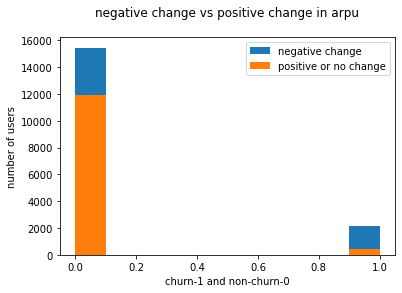

In [53]:
# plotting for both positive and negative change
plt.hist(telechurn70[telechurn70['7to8_chan_per']<0].churn,label='negative change')
plt.hist(telechurn70[telechurn70['7to8_chan_per']>=0].churn,label='positive or no change')
plt.legend(loc='best')
plt.title('negative change vs positive change in arpu\n')
plt.ylabel('number of users')
plt.xlabel('churn-1 and non-churn-0')

**Inferences**

There are overall more number of users having negative-change.


Also, for negative change for churn is proportionately larger for negative change.

#### age (months) in bins

In [54]:
# age on network in months

telechurn70['aon_months']=telechurn70['aon']//30


In [55]:
# claculating age bin edges maxium age and minimum
age_bin=np.linspace(telechurn70['aon_months'].min(),
                    telechurn70['aon_months'].max(),num=20).round(0).astype('int')

In [56]:
age_bin

array([  6,  13,  21,  28,  35,  42,  50,  57,  64,  71,  79,  86,  93,
       100, 108, 115, 122, 129, 137, 144])

In [57]:
## making  network age bins 
telechurn70['nage_bin']=pd.cut(telechurn70['aon_months'],age_bin,
labels=['6-13','13-21','21-28','28-35','35-42','42-50','50-57','57-64','64-71','71-79','79-86','86-93','93-100',
        '100-108','108-115','115-122','122-129','129-137','137-144'])

In [58]:
telechurn70.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [59]:
#dropping age on network 
telechurn70=telechurn70.drop('aon_months',axis=1)

#### Checking imbalance ratio

In [60]:
#ratio
churn_ratio=telechurn70['churn'].value_counts(normalize=True)
churn_ratio

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [61]:
# segregtaing on basis churn values

telechurn70_0=telechurn70[telechurn70['churn']==0]

telechurn70_1=telechurn70[telechurn70['churn']==1]

In [62]:
#plotting ratio
sns.countplot(y='churn',order=churn_ratio.index,data=telechurn70)
plt.title('Imbalance ratio\n')

Text(0.5, 1.0, 'Imbalance ratio\n')

**Inferences**

`8.64` churn percentage

We will correct it during model building.

In [63]:
#boxplot for age on network
sns.boxplot(x='churn',y='aon',data=telechurn70)
plt.title('age on network for churn and non-churn users\n')
plt.ylabel('age')

Text(0, 0.5, 'age')

## EDA for action phase

**Inferences**

Both `Lower` and `Upper` limit of age on network for churn is less than that of non-churn users.

Median of is also lower for churn

New users churn more than that of old users.

Text(0.5, 1.0, 'outgoing minutes of usage for churn and non-churn users\n')

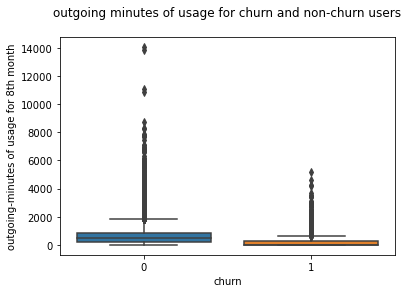

In [64]:
sns.boxplot(x='churn',y='total_og_mou_8',data=telechurn70)
plt.ylabel('outgoing-minutes of usage for 8th month')
plt.title('outgoing minutes of usage for churn and non-churn users\n')

**Inferences**

Both `Lower` and `Upper` limit of outgoing minutes for churn is less than that of non-churn users.

Median of is also lower for churn

Less usage customers for last month are more likely to churn more than that of more usage customers

Text(0.5, 1.0, 'total recharge for churn and non-churn users\n')

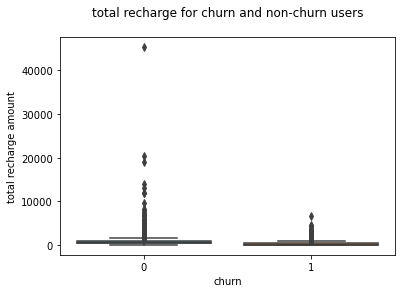

In [65]:
#Boxplot for 8th month total recharge
sns.boxplot(x='churn',y='total_rech_amt_8',data=telechurn70)
plt.ylabel("total recharge amount")
plt.title('total recharge for churn and non-churn users\n')

**Inferences**

Both `Lower` and `Upper` limit of outgoing minutes for churn and non-churn usersare almost equal except outliers are present on higher level for non-churn users



In [66]:
# plotting for incoming minutes for 8 th month
sns.boxplot(x='churn',y='total_ic_mou_8',data=telechurn70)
plt.ylabel("incoming minutes for 8th month ")
plt.title('incoming minutes of usage for churn and non-churn users\n')

Text(0.5, 1.0, 'incoming minutes of usage for churn and non-churn users\n')

Both `Lower` and `Upper` limit of age on network for churn is less than that of non-churn users.

Median of is also lower for churn



#### EDA for all the three months

Text(0, 0.5, 'average revenue per person')

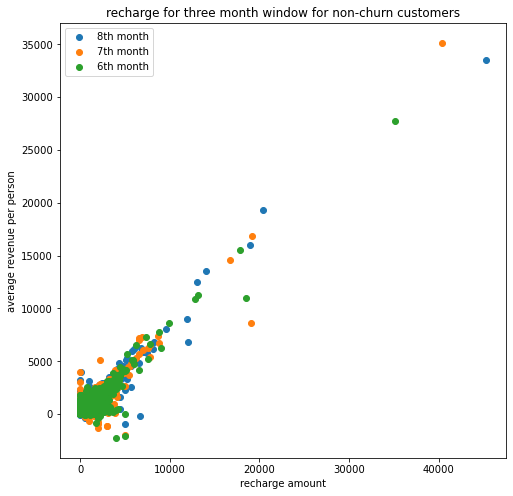

In [67]:
#scatter plot for non-churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='total_rech_amt_8',y='arpu_8',data=telechurn70_0,label='8th month')
plt.scatter(x='total_rech_amt_7',y='arpu_7',data=telechurn70_0,label='7th month')
plt.scatter(x='total_rech_amt_6',y='arpu_6',data=telechurn70_0,label='6th month')
plt.legend(loc='best')
plt.title('recharge for three month window for non-churn customers')
plt.xlabel('recharge amount')
plt.ylabel('average revenue per person')

Text(0, 0.5, 'average revenue per person')

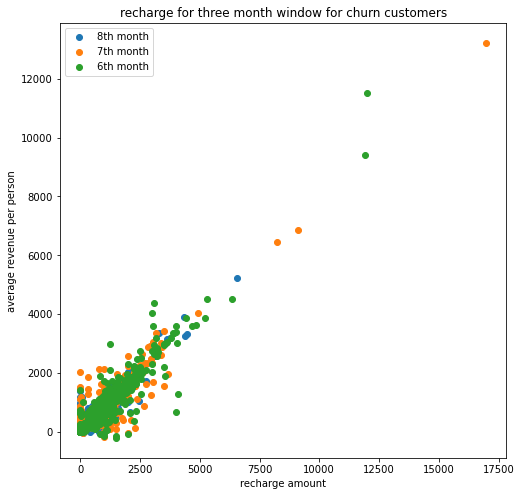

In [68]:
#scatter plot for churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='total_rech_amt_8',y='arpu_8',data=telechurn70_1,label='8th month')
plt.scatter(x='total_rech_amt_7',y='arpu_7',data=telechurn70_1,label='7th month')
plt.scatter(x='total_rech_amt_6',y='arpu_6',data=telechurn70_1,label='6th month')
plt.legend(loc='best')
plt.title('recharge for three month window for churn customers')
plt.xlabel('recharge amount')
plt.ylabel('average revenue per person')

**Inferences**
From above two graphs we can observe that for churn customers range of average revenue per user and total recharge for three window is less than that of non-churn customers.

Both average revenue per user and total recharge are linearly correlated with each other for three months.



Text(0, 0.5, 'average revenue per person')

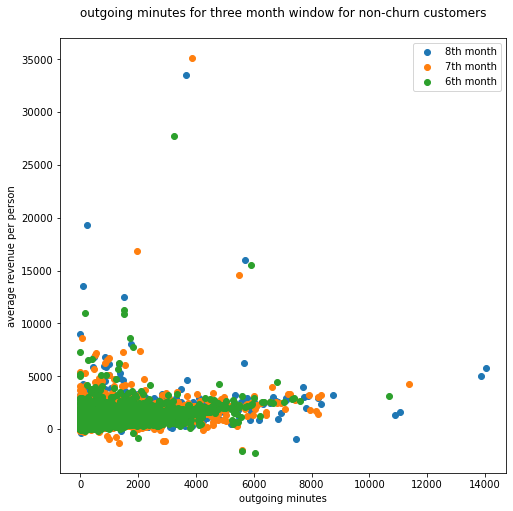

In [69]:
#scatter plot for non-churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='total_og_mou_8',y='arpu_8',data=telechurn70_0,label='8th month')
plt.scatter(x='total_og_mou_7',y='arpu_7',data=telechurn70_0,label='7th month')
plt.scatter(x='total_og_mou_6',y='arpu_6',data=telechurn70_0,label='6th month')
plt.legend(loc='best')
plt.title('outgoing minutes for three month window for non-churn customers\n')
plt.xlabel('outgoing minutes')
plt.ylabel('average revenue per person')

Text(0, 0.5, 'average revenue per person')

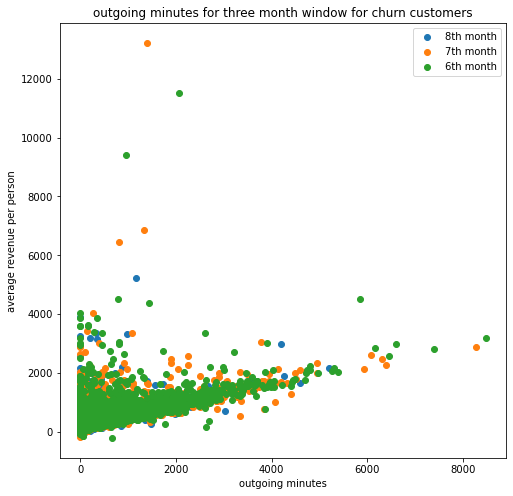

In [70]:
#scatter plot for churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='total_og_mou_8',y='arpu_8',data=telechurn70_1,label='8th month')
plt.scatter(x='total_og_mou_7',y='arpu_7',data=telechurn70_1,label='7th month')
plt.scatter(x='total_og_mou_6',y='arpu_6',data=telechurn70_1,label='6th month')
plt.legend(loc='best')
plt.title('outgoing minutes for three month window for churn customers')
plt.xlabel('outgoing minutes')
plt.ylabel('average revenue per person')

**Inferences**
From above two graphs we can observe that for churn customers range of average revenue per user and outgoing for three window is less than that of non-churn customers.

Both average revenue per user and total recharge are linearly correlated with slope less than 45degree  indicate that for every minute there is less increase each other for three months.



Text(0, 0.5, 'incoming minutes ')

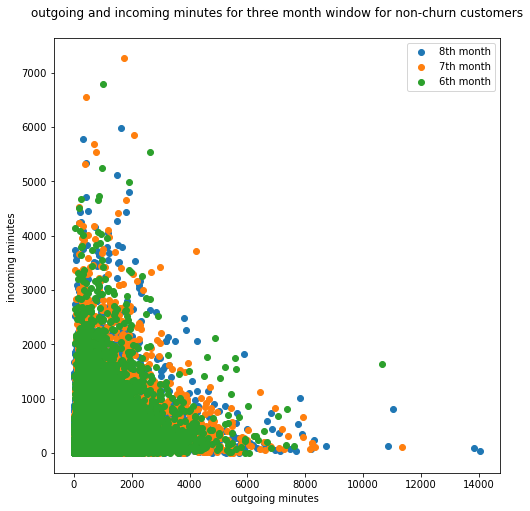

In [71]:
#scatter plot for non-churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='total_og_mou_8',y='total_ic_mou_8',data=telechurn70_0,label='8th month')
plt.scatter(x='total_og_mou_7',y='total_ic_mou_7',data=telechurn70_0,label='7th month')
plt.scatter(x='total_og_mou_6',y='total_ic_mou_6',data=telechurn70_0,label='6th month')

plt.legend(loc='best')
plt.title('outgoing and incoming minutes for three month window for non-churn customers\n')
plt.xlabel('outgoing minutes ')
plt.ylabel('incoming minutes ')

Text(0, 0.5, 'incoming minutes ')

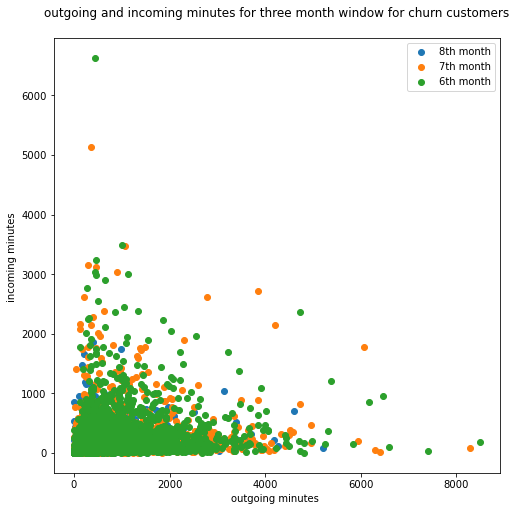

In [72]:
#scatter plot for churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='total_og_mou_8',y='total_ic_mou_8',data=telechurn70_1,label='8th month')
plt.scatter(x='total_og_mou_7',y='total_ic_mou_7',data=telechurn70_1,label='7th month')
plt.scatter(x='total_og_mou_6',y='total_ic_mou_6',data=telechurn70_1,label='6th month')

plt.legend(loc='best')
plt.title('outgoing and incoming minutes for three month window for churn customers\n')
plt.xlabel('outgoing minutes ')
plt.ylabel('incoming minutes ')

**Inferences**

From above two graphs we can observe that for churn customers range of average revenue per user and outgoing for three window is less than that of non-churn customers.

Both incoming minutes and outgoing are somewhat inversaly correlated mostly clustered around bottom left corner of graph for all of the months.



Text(0, 0.5, '3g data in mb')

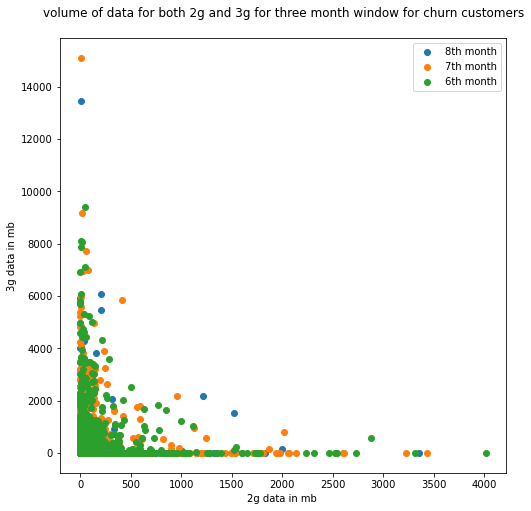

In [73]:
#scatter plot for churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='vol_2g_mb_8',y='vol_3g_mb_8',data=telechurn70_1,label='8th month')
plt.scatter(x='vol_2g_mb_7',y='vol_3g_mb_7',data=telechurn70_1,label='7th month')
plt.scatter(x='vol_2g_mb_6',y='vol_3g_mb_6',data=telechurn70_1,label='6th month')

plt.legend(loc='best')
plt.title('volume of data for both 2g and 3g for three month window for churn customers\n')
plt.xlabel('2g data in mb ')
plt.ylabel('3g data in mb')

Text(0, 0.5, '3g data in mb')

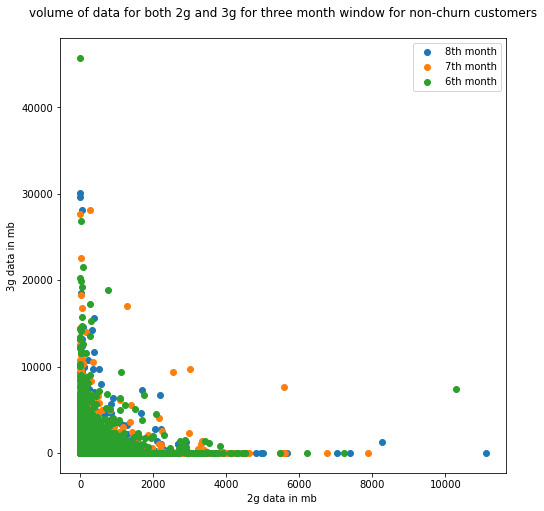

In [74]:
#scatter plot for non-churn customers 
plt.figure(figsize=(8,8))
plt.scatter(x='vol_2g_mb_8',y='vol_3g_mb_8',data=telechurn70_0,label='8th month')
plt.scatter(x='vol_2g_mb_7',y='vol_3g_mb_7',data=telechurn70_0,label='7th month')
plt.scatter(x='vol_2g_mb_6',y='vol_3g_mb_6',data=telechurn70_0,label='6th month')

plt.legend(loc='best')
plt.title('volume of data for both 2g and 3g for three month window for non-churn customers\n')
plt.xlabel('2g data in mb ')
plt.ylabel('3g data in mb')

**Inferences**

From above two graphs we can observe that for churn customers range of both 2g and 3g data for three month  window is less than that of non-churn customers.

Both 2g and 3g data are somewhat inversaly correlated mostly clustered around bottom left corner of graph for all of the months implies that a customer using more 3g data used less 2g data and vice-versa.



Text(0.5, 1.0, 'Network age for non-churn users\n')

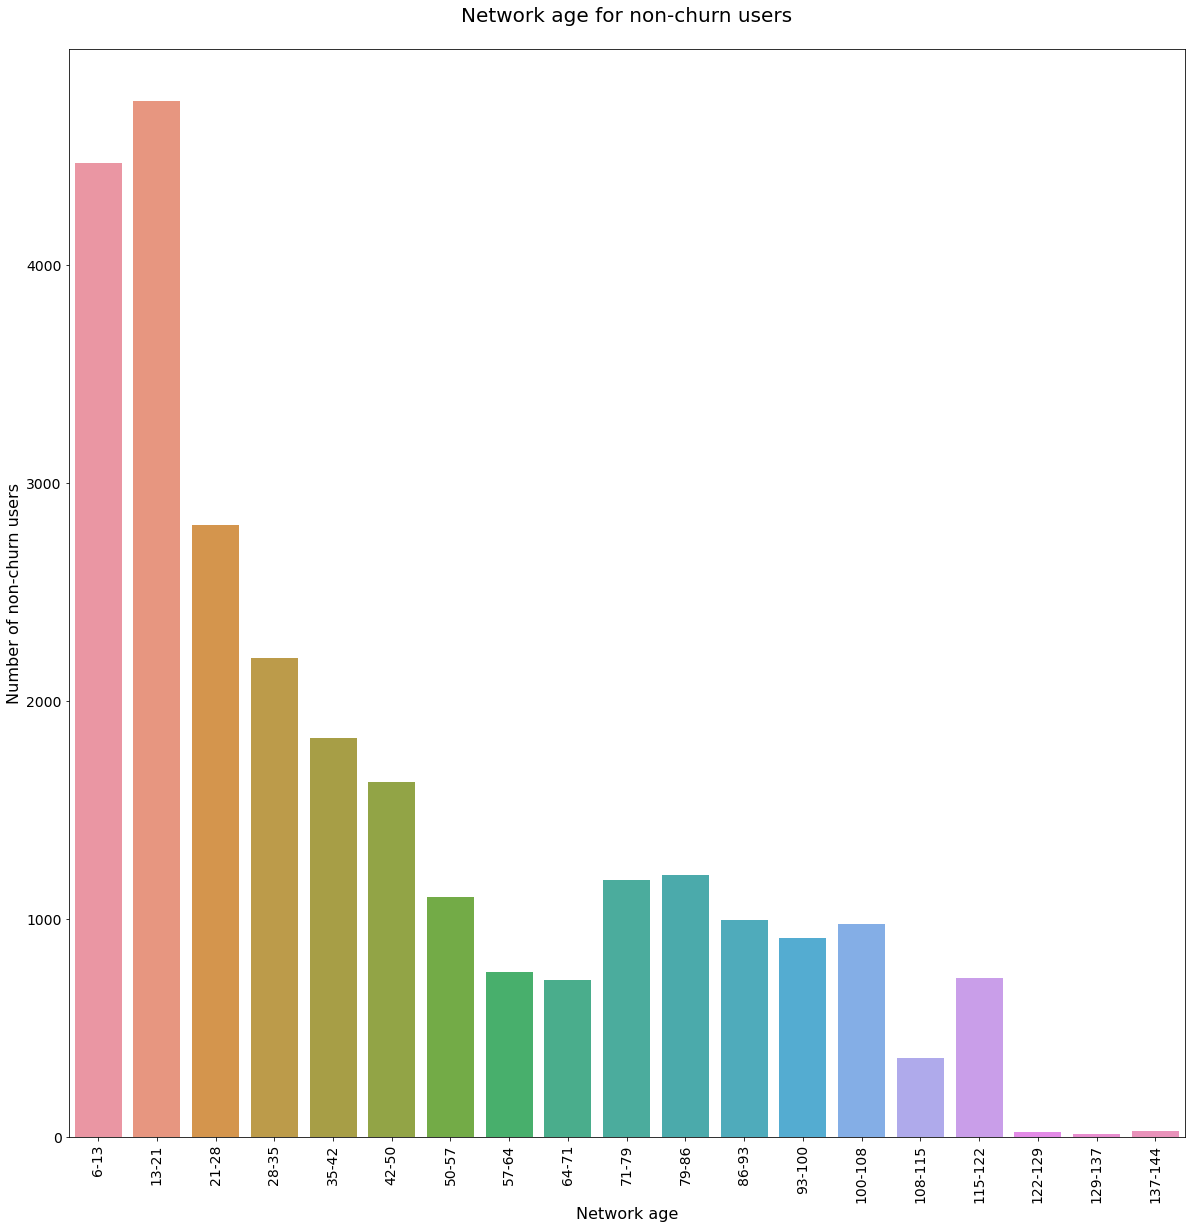

In [75]:
# histogram for bins on network

plt.figure(figsize=(20,20))
sns.countplot(telechurn70_0['nage_bin'])
plt.xlabel('Network age',fontsize=16)
plt.ylabel('Number of non-churn users',fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title('Network age for non-churn users\n',fontsize=20)

**Inferences**

Here bar of thirteen to twenty one months is highest showing that they hold maximum proportion in non -churn cases

Text(0.5, 1.0, 'Network age for churn users\n')

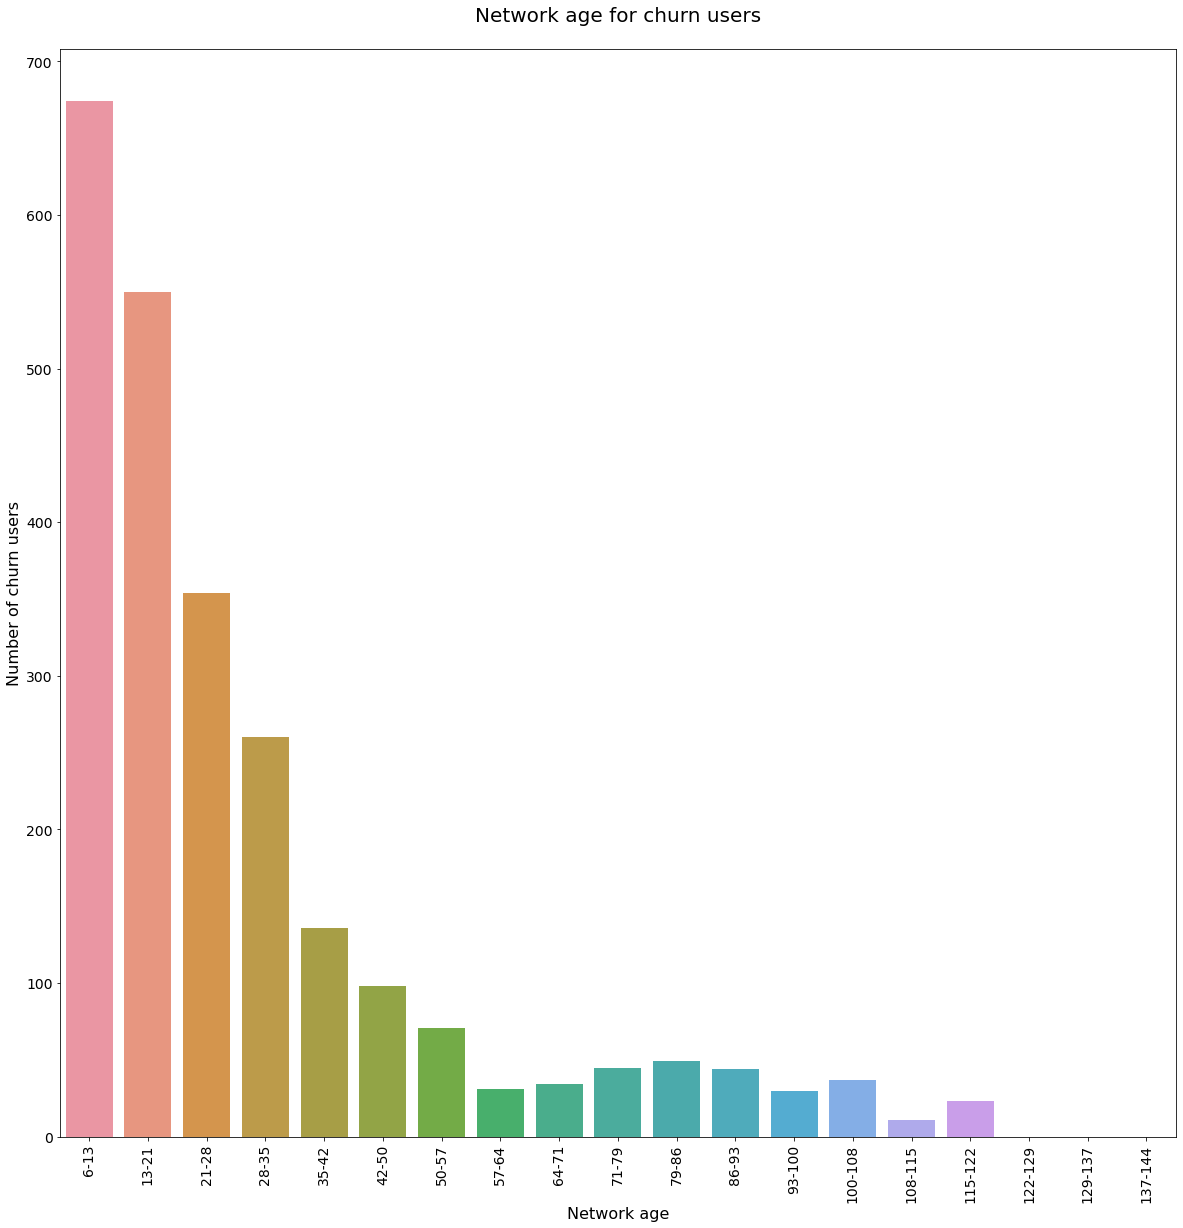

In [76]:
plt.figure(figsize=(20,20))
sns.countplot(telechurn70_1['nage_bin'])
plt.xlabel('Network age',fontsize=16)
plt.ylabel('Number of churn users',fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title('Network age for churn users\n',fontsize=20)

**Inferences**

Here customers in 6 months to 13 months age on network bracket has highest propotion in churn cases

While users who are using network for more than 12 years did not show churn pattern

In [77]:
# calculating fb users for all months for non_churn
fb0=telechurn70_0[['fb_user_6','fb_user_7','fb_user_8']].sum()
fb0

fb_user_6    9578.0
fb_user_7    9822.0
fb_user_8    9612.0
dtype: float64

Text(0.5, 1.0, 'Total number of facebook users for three months window(non-churn users)\n  ')

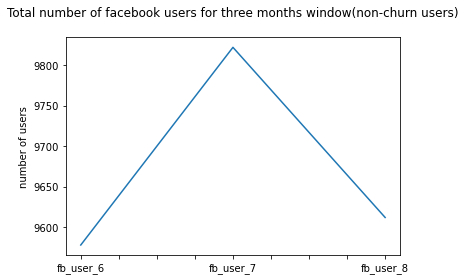

In [78]:
#facebook users for three months window(non-churn users)
fb0.plot()
plt.ylabel('number of users')

plt.title('Total number of facebook users for three months window(non-churn users)\n  ')

In [79]:
# calculating fb users for all months for churn
fb1=telechurn70_1[['fb_user_6','fb_user_7','fb_user_8']].sum()
fb1

fb_user_6    652.0
fb_user_7    555.0
fb_user_8    230.0
dtype: float64

Text(0.5, 1.0, 'Total number of facebook users for three months window(non-churn users)\n  ')

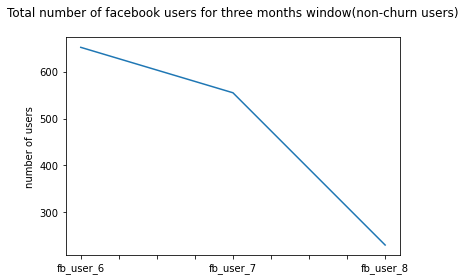

In [80]:

fb1.plot()
plt.ylabel('number of users')

plt.title('Total number of facebook users for three months window(non-churn users)\n  ')


**Inferences**

The above two plots has shown for non-churn users first increase in numer of facebook pack users from 6th month to 7th month and then decline from 7th to 8th month  whereas for churn users there is consistent drop in number of users every month.

## Multivariate analysis

In [81]:
# relevent features to plot heatmap
heatmap1=['total_rech_data_8','arpu_8','fb_user_8','total_og_mou_8','total_ic_mou_8','total_rech_num_8','aon',
 'total_rech_amt_8','vol_2g_mb_8','vol_2g_mb_7','vol_2g_mb_6','vol_3g_mb_7','total_rech_data_7','total_rech_data_6','total_og_mou_7','total_og_mou_6','total_rech_amt_7','total_rech_amt_6',
 'vol_3g_mb_8','vol_3g_mb_6','total_ic_mou_7','total_ic_mou_6']

In [82]:
# correlation for non churn
correlation0=telechurn70_0[heatmap1].corr()

In [83]:
# correlation for churn
correlation1=telechurn70_1[heatmap1].corr()

In [84]:
# plotting for heatmap non-churn
plt.figure(figsize=(20,20))
sns.heatmap(correlation0,annot=True)
plt.title('heatmap for non-churn\n',fontsize=24)

Text(0.5, 1.0, 'heatmap for non-churn\n')

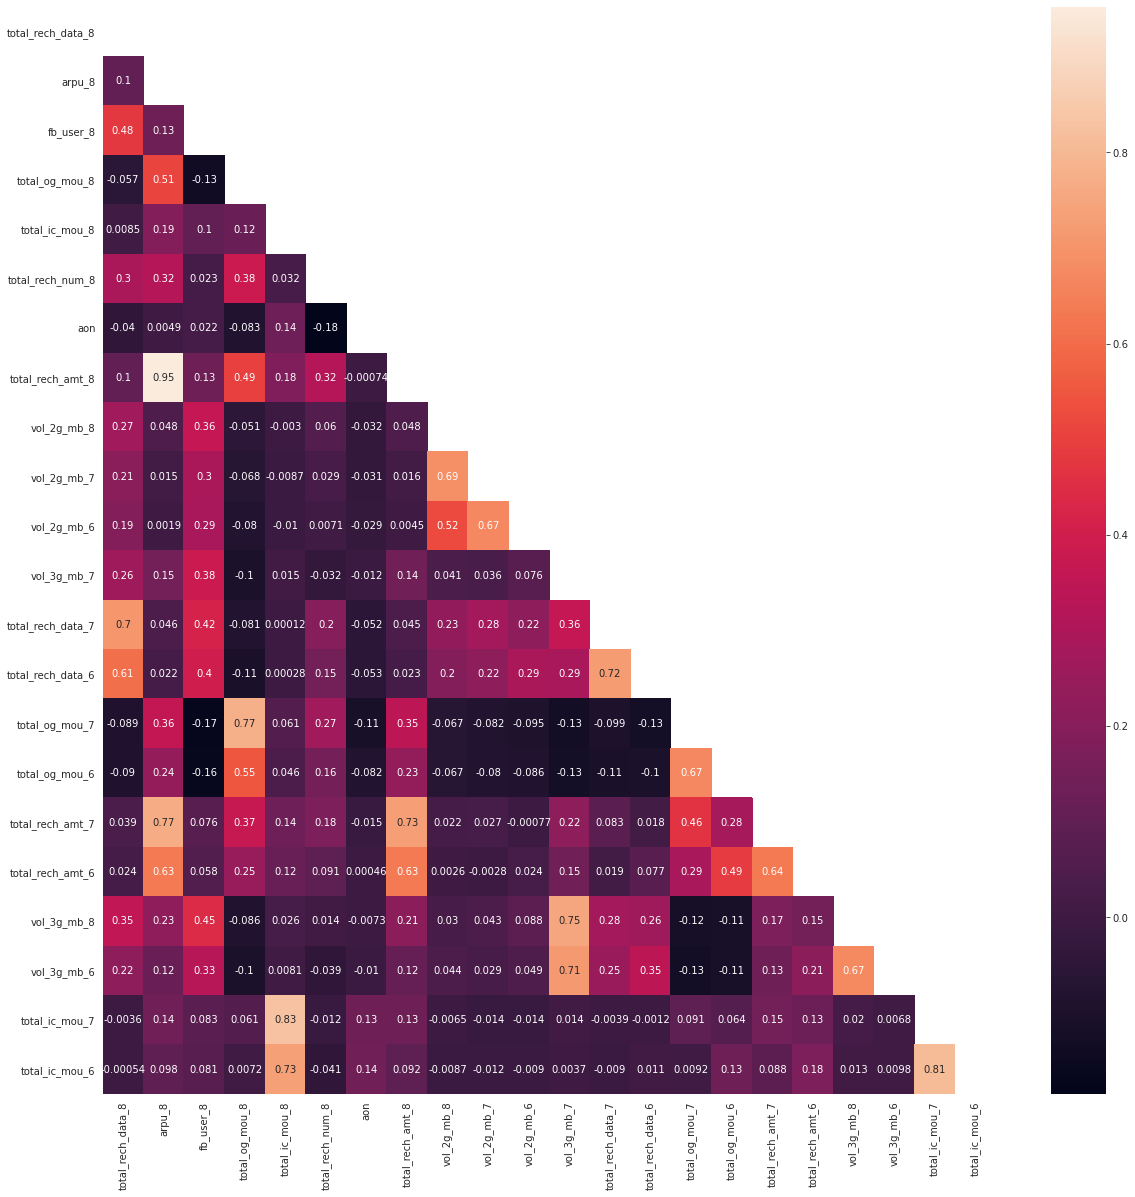

In [85]:
# removing self-correlation and repeated values
mask = np.zeros_like(correlation0)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(correlation0, mask=mask, annot=True)

In [86]:
#plotting heatmap for churn
plt.figure(figsize=(20,20))
sns.heatmap(correlation1,annot=True)
plt.title('heatmap for churn\n',fontsize=24)

Text(0.5, 1.0, 'heatmap for churn\n')

In [87]:
# removing self-correlation and repeated values
mask = np.zeros_like(correlation1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(correlation1, mask=mask, annot=True)

**Inferences**

For non churn users total incoming of 8th month is *highly correlated* to previous months (6th and 7th) but for it is less correlated.Also 6th and 7th month incomings are also highly correlated for non-churn users than churn users.

Similar observation volume for 3G  data in MBs and total outgoing minutes of usage.

Total recharge data for 8th month is highly correlated to total recharge data for 7th month for non churn users then in 

## Outlier detection and treatment

In [88]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
des=telechurn70.describe(percentiles=[.01,.05,.25,.5,.75,.90,.95,.99])
des

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     587.284404    589.135427    534.857433    296.034461    304.343206   
std      442.722413    462.897814    492.259586    460.775592    481.780488   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%        18.231900     25.782700      0.000000      0.000000      0.000000   
5%       201.926000    212.671000     22.206000      2.380000      2.330000   
25%      364.161000    365.004500    289.609500     41.110000     40.950000   
50%      495.682000    493.561000    452.091000    125.830000    125.460000   
75%      703.922000    700.788000    671.150000    353.310000    359.925000   
90%      994.099000    995.557000    985.202000    794.980000    824.380000   
95%     1240.793500   1261.421500   1258.555500   1153.970000   1208.175000   
99%     1983.089500   1999.374500   1987.934400   2166.370000   2220.367000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000   30011.000000   
mean     267.600412    417.933372    423.924375    375.021691      17.412764   
std      466.560947    470.588583    486.525332    477.489377      79.152657   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
5%         0.000000     20.640000     21.930000      0.170000       0.000000   
25%       27.010000    137.335000    135.680000     95.695000       0.000000   
50%       99.440000    282.190000    281.940000    240.940000       0.000000   
75%      297.735000    523.125000    532.695000    482.610000       0.000000   
90%      723.610000    915.580000    935.690000    853.790000      32.730000   
95%     1115.660000   1271.470000   1286.285000   1188.460000      94.585000   
99%     2188.504000   2326.290000   2410.104000   2211.642000     349.353000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000    30011.00000   30011.000000   30011.000000   
mean       13.522114       13.25627      29.321648      22.036003   
std        76.303736       74.55207     118.570414      97.925249   
min         0.000000        0.00000       0.000000       0.000000   
1%          0.000000        0.00000       0.000000       0.000000   
5%          0.000000        0.00000       0.000000       0.000000   
25%         0.000000        0.00000       0.000000       0.000000   
50%         0.000000        0.00000       0.000000       0.000000   
75%         0.000000        0.00000       0.000000       0.000000   
90%        18.360000       18.68000      64.480000      41.200000   
95%        63.335000       62.79500     168.460000     119.335000   
99%       292.540000      288.48500     543.709000     448.125000   
max      3813.290000     4169.81000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30011.000000      30011.000000      30011.000000      30011.000000   
mean       21.469272         94.680696         95.729729         87.139995   
std       106.244774        236.849265        248.132623        234.721938   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
5%          0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.320000          9.130000          5.790000   
50%         0.000000         32.590000         33.160000         28.640000   
75%         0.000000         91.460000         91.480000         84.670000   
90%        37.110000        207.930000

In [89]:
for col in list(des.columns):
    
    
    telechurn70[telechurn70[col]>np.percentile(telechurn70[col],99)][col]=np.percentile(telechurn70[col],99)
    telechurn70[telechurn70[col]<np.percentile(telechurn70[col],1)][col]=np.percentile(telechurn70[col],1)

## Model Building

-train_test split

-PCA

-Logistic regression using class balance

-Model evaluation 

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
import statsmodels.api as sm

In [92]:
from sklearn.decomposition import PCA

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:

#from sklearn.model_selection import GridSearchCV

In [96]:
# extracting features by dropping churn 
# dropping age on network bin as we have 'aon' in discrete form 

X=telechurn70.drop(['churn','nage_bin'],axis=1) 
y=telechurn70['churn'] # target variable

### Interpertable model

In [97]:
## scaling
scaler=StandardScaler()

In [98]:
scaler.fit(X)

StandardScaler()

###  Multicollinearity 

It is a situation where two or more predictors are highly linearly related. In general, an absolute  ***correlation coefficient >0.7*** among two or more predictors indicates the presence of multicollinearity

In [99]:
# multi correlation matrix 
multi=X.corr()
# applying threshold
multi=multi[abs(multi)>.7]
multi

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000       NaN       NaN          NaN          NaN   
arpu_7                   NaN  1.000000  0.740811          NaN          NaN   
arpu_8                   NaN  0.740811  1.000000          NaN          NaN   
onnet_mou_6              NaN       NaN       NaN     1.000000     0.719356   
onnet_mou_7              NaN       NaN       NaN     0.719356     1.000000   
onnet_mou_8              NaN       NaN       NaN          NaN     0.793390   
offnet_mou_6             NaN       NaN       NaN          NaN          NaN   
offnet_mou_7             NaN       NaN       NaN          NaN          NaN   
offnet_mou_8             NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_6            NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_7            NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_8            NaN       NaN       NaN          NaN          NaN   
roam_og_mou_6            NaN       NaN       NaN          NaN          NaN   
roam_og_mou_7            NaN       NaN       NaN          NaN          NaN   
roam_og_mou_8            NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_mou_6             NaN       NaN       NaN          NaN          NaN   
loc_og_mou_7             NaN       NaN       NaN          NaN          NaN   
loc_og_mou_8             NaN       NaN       NaN          NaN          NaN   
std_og_t2t_mou_6         NaN       NaN       NaN     0.851039          NaN   
std_og_t2t_mou_7         NaN       NaN       NaN          NaN     0.853116   
std_og_t2t_mou_8         NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_6         NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_7         NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_8         NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_6         NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_7         NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_8         NaN       NaN       NaN          NaN          NaN   
std_og_mou_6             NaN       NaN       NaN          NaN          NaN   
std_og_mou_7             NaN       NaN       NaN          NaN          NaN   
std_og_mou_8             NaN       NaN       NaN          NaN          NaN   
isd_og_mou_6             NaN       NaN       NaN          NaN          NaN   
isd_og_mou_7             NaN       NaN       NaN          NaN          NaN   
isd_og_mou_8             NaN       NaN       NaN          NaN          NaN   
spl_og_mou_6             NaN       NaN       NaN          NaN          NaN   
spl_og_mou_7             NaN       NaN       NaN          NaN          NaN   
spl_og_mou_8             NaN       NaN       NaN          NaN          NaN   
og_others_6              NaN       NaN       NaN          NaN          NaN   
og_others_7              NaN       NaN       NaN          NaN          NaN   
og_others_8              NaN       NaN      

In [100]:
multi.shape


(158, 158)

In [101]:
#lower triangular heatmap for correlation matrix using mask
plt.figure(figsize=(50,50))
mask=np.zeros_like(multi)

mask[np.triu_indices_from(mask)]=True

sns.heatmap(multi[multi>.7],annot=True,annot_kws={"fontsize":28},mask=mask,cmap='Greys')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [102]:
## getting list of columns to be droppedt 
multi_list=[]

for i in range(58):
    for j in range(i+1,58):
        
        #check matrix element not 1 or null(less than .7)
        if multi.iloc[i,j] != 'NaN':
            if multi.iloc[i,j] !=1:
                
               #getting column name
                k=list(multi.columns)[j]
                
                #checking for element presence in list
                if k not in multi_list:#
                    
                    
                    #appending list to be dropped
                    multi_list.append(k)
                
        

In [103]:
 multi_list

['arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',


In [104]:
#dropping columns with multicollinearity
X_new=X.drop(multi_list,axis=1)

In [105]:
X_new.shape

(30011, 101)

In [106]:
X_new.head()

arpu_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
7   1069.180            221.49            121.19            152.16   
8    378.721             13.98             15.48              0.00   
13   492.846             18.53            195.18              4.81   
16   430.975            149.69            150.16              8.71   
17   690.008              2.31              0.00              0.00   

    loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
7             101.46             39.53        427.88        355.23   
8               0.00              0.00         81.43         23.83   
13              0.00              7.49        215.58         26.11   
16              8.68             32.71        276.86        229.83   
17              0.00              0.00         81.96          2.31   

    loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
7         188.04             36.89             11.83             30.39   
8          15.79              0.00              0.58              0.10   
13        255.26            115.68             38.29            154.58   
16        211.78             68.79             78.64              6.33   
17          0.00              8.63              0.00              0.00   

    std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  \
7              91.44            126.99            141.33             52.19   
8              22.43              4.08              0.65              0.00   
13            308.13             29.79            317.91              0.00   
16             18.68             73.08             73.93              0.51   
17              1.28              0.00              0.00              0.00   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
7              34.24             22.21               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13              0.00              1.91               0.0               0.0   
16              0.00              2.18               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
7                0.0        180.54        173.08        193.94   
8                0.0         22.43          4.66          0.75   
13               0.0        423.81         68.09        474.41   
16               0.0         87.99        151.73         82.44   
17               0.0          9.91          0.00          0.00   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
7           626.46          558.04          428.74          0.21   
8           103.86           28.49           16.54          0.00   
13          968.61          172.58         1144.53          0.45   
16          364.86          381.56          294.46          0.00   
17           91.88            2.31            0.00          0.00   

    spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
7            0.0           0.0          2.06         14.53         31.59   
8            0.0           0.0          0.00          0.00          0.00   
13           0.0           0.0        245.28         62.11        393.39   
16           0.0           0.0          0.00          0.00          0.23   
17           0.0           0.0          0.00          0.00          0.00   

    ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
7         15.74        15.19        15.14                 5                 5   
8          0.00         0.00         0.00                19                21   
13        83.48        16.24        21.44                 6                 4   
16         0.00         0.00         0.00                10                 6   
17         0.00         0.00         0.00                19                 2   

    total_rech_num_8  total_rec

#### Splitting the data into Train and Test 

In [107]:
#80:20 split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,train_size=.8,random_state=100)

In [108]:
X_train.head()

arpu_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
6218    866.709            276.11            149.54              0.46   
69580  1444.288            231.94            270.79             41.88   
60857   302.930            153.69            185.06              2.71   
2845    824.925            196.13            364.16              0.00   
2633    492.446             13.63             13.16              0.65   

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
6218               0.00              0.25         78.63        296.66   
69580             38.81             47.93        454.81        364.26   
60857              0.00              3.21        338.03        293.19   
2845               0.11              0.00        265.09        328.23   
2633               3.19              2.21         39.18         27.49   

       loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
6218         181.08             11.54             97.56             65.24   
69580        447.88              9.24              0.25              4.73   
60857        301.61              1.90             20.18             19.81   
2845         487.36              0.00              0.00              0.00   
2633          29.41              0.00              0.00              0.00   

       std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  \
6218               9.46             70.23             41.33               0.0   
69580              0.05              0.58              0.00               0.0   
60857             13.54              8.38             17.28               0.0   
2845               5.93             35.88             11.66               0.0   
2633               0.35              0.00              1.63               0.0   

       std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
6218                0.0              0.00               0.0               0.0   
69580               0.0              1.38               0.0               0.0   
60857               0.0              0.00               0.0               0.0   
2845                0.0              0.00               0.0               0.0   
2633                0.0              0.00               0.0               0.0   

       std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
6218                0.0         21.01        167.79        106.58   
69580               0.0          9.29          0.83          6.11   
60857               0.0         15.44         28.56         37.09   
2845                0.0          5.93         35.88         11.66   
2633                0.0          0.35          0.00          1.63   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
6218            99.64          464.46          287.66          0.00   
69580          464.38          365.09          454.74          0.00   
60857          358.39          327.08          338.71          0.00   
2845           284.09          372.73          558.18          0.00   
2633            40.11           31.24           31.04          0.18   

       spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
6218            0.0           0.0          0.00          0.00          0.00   
69580           0.0           0.0          0.00          0.00          0.00   
60857           0.0           0.0          4.91          5.31          0.00   
2845            0.0           0.0         13.06          8.61         44.09   
2633            0.0           0.0          0.00          0.00          0.00   

       ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
6218          0.00         0.00         0.00                28   
69580         0.26         0.00         0.74                 8   
60857         0.00         0.00         0.00                 5   
2845          0.00         0.00        15.05                 4   
2633          0.40         3.74         0.00   

In [109]:
X_test.shape

(6003, 101)

### RFE

In [110]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [111]:
# Running RFE with the O/P no. of variables equal to 50

rfe=RFE(lr,50)
rfe=rfe.fit(X_train,y_train)

In [112]:
# Checking 50 RFE selected Variables

list(zip(X_train, rfe.support_, rfe.ranking_))

[('arpu_6', False, 13),
 ('loc_ic_t2m_mou_7', False, 22),
 ('loc_ic_t2m_mou_8', False, 36),
 ('loc_ic_t2f_mou_6', False, 17),
 ('loc_ic_t2f_mou_7', False, 45),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_6', False, 27),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_6', True, 1),
 ('std_ic_t2t_mou_7', True, 1),
 ('std_ic_t2t_mou_8', False, 4),
 ('std_ic_t2m_mou_6', True, 1),
 ('std_ic_t2m_mou_7', False, 6),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_t2f_mou_6', True, 1),
 ('std_ic_t2f_mou_7', True, 1),
 ('std_ic_t2f_mou_8', True, 1),
 ('std_ic_t2o_mou_6', False, 52),
 ('std_ic_t2o_mou_7', False, 50),
 ('std_ic_t2o_mou_8', False, 51),
 ('std_ic_mou_6', True, 1),
 ('std_ic_mou_7', False, 5),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_6', False, 7),
 ('total_ic_mou_7', False, 40),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_6', True, 1),
 ('spl_ic_mou_7', False, 34),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 8),
 ('isd_ic_mou_7', True, 1),
 ('isd_ic

In [113]:
# Storing the 50 RFE selected variables in col

col= X_train.columns[rfe.support_]
col

Index(['loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_8', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'arpu_3g_8', 'arpu_2g_7',
       'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'fb_user_7', 'fb_user_8', 'aon', 'sep_vbc_3g', 'recharge_avg_6and7'],
      dtype='object')

In [114]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe=X_train[col]
X_train_rfe.head(2)

loc_ic_t2f_mou_8  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
6218               0.25        296.66        181.08             11.54   
69580             47.93        364.26        447.88              9.24   

       std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_8  std_ic_t2f_mou_6  \
6218              97.56              9.46             41.33               0.0   
69580              0.25              0.05              0.00               0.0   

       std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_8  \
6218                0.0              0.00         21.01        106.58   
69580               0.0              1.38          9.29          6.11   

       total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_8  isd_ic_mou_7  isd_ic_mou_8  \
6218           287.66           0.0           0.0           0.0           0.0   
69580          454.74           0.0           0.0           0.0           0.0   

       ic_others_6  ic_others_7  total_rech_num_6  total_rech_num_7  \
6218          0.00          0.0                28                31   
69580         0.26          0.0                 8                 5   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_6  last_day_rch_amt_7  \
6218                 35              1026             110                  10   
69580                 6              1304             500                 250   

       last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
6218                   30                0.0                0.0   
69580                 250                4.0                2.0   

       total_rech_data_8  max_rech_data_8  count_rech_2g_6  count_rech_2g_8  \
6218                 0.0              0.0              0.0              0.0   
69580                4.0            152.0              2.0              2.0   

       count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  arpu_3g_8  arpu_2g_7  \
6218               0.0                 0.0         0.00       0.00       0.00   
69580              2.0               608.0       235.63     127.73      63.96   

       arpu_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_7  \
6218        0.00            0            0            0             0   
69580     127.92            2            1            2             0   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_7  fb_user_8   aon  \
6218             0            0            0        0.0        0.0   695   
69580            2            1            2        1.0        1.0  2869   

       sep_vbc_3g  recharge_avg_6and7  
6218         0.00               999.0  
69580       11.75              1353.0

### Building model using Statsmodels without PCA

#### Model1

In [115]:
# Add Constant to get intercept

X_train_sm= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23958
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4728.0
Date:                Mon, 03 May 2021   Deviance:                       9456.0
Time:                        12:31:27   Pearson chi2:                 1.14e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7253      0.082     -8.797      0.000      -0.887      -0.564
loc_ic_t2f_mou_8      -0.0013      0.003     -0.492      0.623      -0.007       0.004
loc_ic_mou_7           0.0020      0.000      9.812      0.000       0.002       0.002
loc_ic_mou_8          -0.0105      0.008     -1.355      0.176      -0.026       0.005
std_ic_t2t_mou_6      -8.5143      5.225     -1.630      0.103     -18.755       1.726
std_ic_t2t_mou_7       0.0019      0.001      2.732      0.006       0.001       0.003
std_ic_t2m_mou_6      -8.5157      5.225     -1.630      0.103     -18.757       1.725
std_ic_t2m_mou_8       0.0068      0.002      3.422      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.5131      5.225     -1.629      0.103     -18.755       1.729
std_ic_t2f_mou_7       0.0026      0.003      0.867      0.386      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.498      0.619      -0.018       0.010
std_ic_mou_6           8.5161      5.225      1.630      0.103      -1.725      18.757
std_ic_mou_8          -0.0104      0.008     -1.304      0.192      -0.026       0.005
total_ic_mou_8         0.0012      0.008      0.158      0.874      -0.014       0.016
spl_ic_mou_6          -0.1904      0.179     -1.065      0.287      -0.541       0.160
spl_ic_mou_8          -4.9760      0.670     -7.422      0.000      -6.290      -3.662
isd_ic_mou_7           0.0015      0.001      2.257      0.024       0.000       0.003
isd_ic_mou_8          -0.0038      0.008     -0.469      0.639      -0.019       0.012
ic_others_6            0.0041      0.005      0.836      0.403      -0.005       0.014
ic_others_7           -0.0141      0.007     -1.901      0.057      -0.029       0.000
total_rech_num_6       0.0063      0.003      1.916      0.055      -0.000       0.013
total_rech_num_7       0.0113      0.005      2.482      0.013       0.002       0.020
total_rech_num_8      -0.0712      0.007    -10.647      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007    9.6e-05     -7.527      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.099      0.272      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.263      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.096      0.000      -0.004      -0.003
total_rech_data_6      0.0086      0.073      0.118      0.906      -0.134       0.151
total_rech_data_7     -0.2052      0.129     -1.587      0.113      -0.459       0.048
total_rech_data_8     -0.2982      0.126     -2.365      0.018      -0.545      -0.051
max_rech_data_8       -0.0002      0.001     -0.198      0.843      -0.002       0.002
count_rech_2g_6       -0.1181      0.133     -0.888      0.375      -0.379       0.143
count_rech_2g_8       -0.0749      0.1

In [116]:
X_train_rfe=X_train_rfe.drop(['total_rech_data_6'], axis=1)

#### Model 2

In [117]:
# Add Constant to get intercept

X_train_sm1= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg1=sm.GLM(y_train,X_train_sm1, family=sm.families.Binomial())
res1=lg1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23959
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4728.0
Date:                Mon, 03 May 2021   Deviance:                       9456.0
Time:                        12:31:28   Pearson chi2:                 1.14e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7252      0.082     -8.797      0.000      -0.887      -0.564
loc_ic_t2f_mou_8      -0.0013      0.003     -0.492      0.623      -0.007       0.004
loc_ic_mou_7           0.0020      0.000      9.811      0.000       0.002       0.002
loc_ic_mou_8          -0.0105      0.008     -1.356      0.175      -0.026       0.005
std_ic_t2t_mou_6      -8.5001      5.224     -1.627      0.104     -18.738       1.738
std_ic_t2t_mou_7       0.0019      0.001      2.730      0.006       0.001       0.003
std_ic_t2m_mou_6      -8.5015      5.224     -1.628      0.104     -18.739       1.736
std_ic_t2m_mou_8       0.0068      0.002      3.420      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.4988      5.224     -1.627      0.104     -18.738       1.740
std_ic_t2f_mou_7       0.0026      0.003      0.866      0.386      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.499      0.618      -0.018       0.010
std_ic_mou_6           8.5018      5.224      1.628      0.104      -1.736      18.740
std_ic_mou_8          -0.0104      0.008     -1.304      0.192      -0.026       0.005
total_ic_mou_8         0.0012      0.008      0.159      0.873      -0.014       0.016
spl_ic_mou_6          -0.1906      0.179     -1.066      0.287      -0.541       0.160
spl_ic_mou_8          -4.9764      0.670     -7.423      0.000      -6.290      -3.662
isd_ic_mou_7           0.0015      0.001      2.256      0.024       0.000       0.003
isd_ic_mou_8          -0.0038      0.008     -0.470      0.638      -0.019       0.012
ic_others_6            0.0041      0.005      0.837      0.402      -0.005       0.014
ic_others_7           -0.0141      0.007     -1.901      0.057      -0.029       0.000
total_rech_num_6       0.0063      0.003      1.917      0.055      -0.000       0.013
total_rech_num_7       0.0113      0.005      2.480      0.013       0.002       0.020
total_rech_num_8      -0.0712      0.007    -10.646      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.57e-05     -7.567      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.117      0.264      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.278      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.098      0.000      -0.004      -0.003
total_rech_data_7     -0.2053      0.129     -1.588      0.112      -0.459       0.048
total_rech_data_8     -0.2970      0.126     -2.364      0.018      -0.543      -0.051
max_rech_data_8       -0.0002      0.001     -0.195      0.845      -0.002       0.002
count_rech_2g_6       -0.1102      0.115     -0.958      0.338      -0.336       0.115
count_rech_2g_8       -0.0757      0.185     -0.409      0.682      -0.438       0.287
count_rech_3g_8       -0.2213      0.1

In [118]:
X_train_rfe=X_train_rfe.drop(['max_rech_data_8'], axis=1)

#### Model 3

In [119]:
# Add Constant to get intercept

X_train_sm2= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg2=sm.GLM(y_train,X_train_sm2, family=sm.families.Binomial())
res2=lg2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23960
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4728.0
Date:                Mon, 03 May 2021   Deviance:                       9456.0
Time:                        12:31:30   Pearson chi2:                 1.14e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7257      0.082     -8.808      0.000      -0.887      -0.564
loc_ic_t2f_mou_8      -0.0013      0.003     -0.491      0.623      -0.007       0.004
loc_ic_mou_7           0.0020      0.000      9.813      0.000       0.002       0.002
loc_ic_mou_8          -0.0105      0.008     -1.357      0.175      -0.026       0.005
std_ic_t2t_mou_6      -8.5016      5.223     -1.628      0.104     -18.739       1.736
std_ic_t2t_mou_7       0.0019      0.001      2.729      0.006       0.001       0.003
std_ic_t2m_mou_6      -8.5030      5.223     -1.628      0.104     -18.741       1.735
std_ic_t2m_mou_8       0.0068      0.002      3.419      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.5003      5.224     -1.627      0.104     -18.739       1.738
std_ic_t2f_mou_7       0.0026      0.003      0.867      0.386      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.499      0.618      -0.018       0.010
std_ic_mou_6           8.5033      5.223      1.628      0.104      -1.734      18.741
std_ic_mou_8          -0.0104      0.008     -1.305      0.192      -0.026       0.005
total_ic_mou_8         0.0012      0.008      0.160      0.873      -0.014       0.016
spl_ic_mou_6          -0.1905      0.179     -1.065      0.287      -0.541       0.160
spl_ic_mou_8          -4.9761      0.670     -7.423      0.000      -6.290      -3.662
isd_ic_mou_7           0.0016      0.001      2.269      0.023       0.000       0.003
isd_ic_mou_8          -0.0038      0.008     -0.471      0.638      -0.019       0.012
ic_others_6            0.0041      0.005      0.835      0.404      -0.005       0.014
ic_others_7           -0.0141      0.007     -1.901      0.057      -0.029       0.000
total_rech_num_6       0.0063      0.003      1.918      0.055      -0.000       0.013
total_rech_num_7       0.0112      0.005      2.479      0.013       0.002       0.020
total_rech_num_8      -0.0712      0.007    -10.644      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.57e-05     -7.573      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.109      0.267      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.281      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.099      0.000      -0.004      -0.003
total_rech_data_7     -0.2046      0.129     -1.583      0.113      -0.458       0.049
total_rech_data_8     -0.2974      0.126     -2.365      0.018      -0.544      -0.051
count_rech_2g_6       -0.1101      0.115     -0.957      0.339      -0.336       0.115
count_rech_2g_8       -0.0839      0.180     -0.466      0.641      -0.437       0.269
count_rech_3g_8       -0.2135      0.166     -1.287      0.198      -0.539       0.112
av_rech_amt_data_8    -0.0019      0.0

In [120]:
X_train_rfe=X_train_rfe.drop(['fb_user_7'], axis=1)

#### Model 4

In [121]:
# Add Constant to get intercept

X_train_sm3= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg3=sm.GLM(y_train,X_train_sm3, family=sm.families.Binomial())
res3=lg3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23961
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4728.6
Date:                Mon, 03 May 2021   Deviance:                       9457.2
Time:                        12:31:31   Pearson chi2:                 1.17e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7157      0.082     -8.746      0.000      -0.876      -0.555
loc_ic_t2f_mou_8      -0.0013      0.003     -0.476      0.634      -0.007       0.004
loc_ic_mou_7           0.0020      0.000      9.832      0.000       0.002       0.002
loc_ic_mou_8          -0.0106      0.008     -1.368      0.171      -0.026       0.005
std_ic_t2t_mou_6      -8.5241      5.222     -1.632      0.103     -18.759       1.711
std_ic_t2t_mou_7       0.0019      0.001      2.730      0.006       0.001       0.003
std_ic_t2m_mou_6      -8.5255      5.222     -1.633      0.103     -18.761       1.710
std_ic_t2m_mou_8       0.0068      0.002      3.415      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.5228      5.223     -1.632      0.103     -18.759       1.713
std_ic_t2f_mou_7       0.0026      0.003      0.854      0.393      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.505      0.614      -0.018       0.010
std_ic_mou_6           8.5259      5.222      1.633      0.103      -1.709      18.761
std_ic_mou_8          -0.0104      0.008     -1.313      0.189      -0.026       0.005
total_ic_mou_8         0.0013      0.008      0.167      0.867      -0.014       0.016
spl_ic_mou_6          -0.1930      0.179     -1.079      0.280      -0.544       0.158
spl_ic_mou_8          -4.9718      0.670     -7.419      0.000      -6.285      -3.658
isd_ic_mou_7           0.0015      0.001      2.270      0.023       0.000       0.003
isd_ic_mou_8          -0.0038      0.008     -0.478      0.632      -0.019       0.012
ic_others_6            0.0041      0.005      0.839      0.401      -0.005       0.014
ic_others_7           -0.0141      0.007     -1.896      0.058      -0.029       0.000
total_rech_num_6       0.0062      0.003      1.899      0.058      -0.000       0.013
total_rech_num_7       0.0113      0.005      2.495      0.013       0.002       0.020
total_rech_num_8      -0.0714      0.007    -10.686      0.000      -0.085      -0.058
total_rech_amt_8      -0.0007   9.57e-05     -7.570      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.099      0.272      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.275      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.121      0.000      -0.004      -0.003
total_rech_data_7     -0.1519      0.119     -1.277      0.201      -0.385       0.081
total_rech_data_8     -0.3041      0.126     -2.414      0.016      -0.551      -0.057
count_rech_2g_6       -0.0975      0.114     -0.853      0.394      -0.322       0.127
count_rech_2g_8       -0.0985      0.180     -0.547      0.585      -0.452       0.255
count_rech_3g_8       -0.2056      0.166     -1.239      0.215      -0.531       0.120
av_rech_amt_data_8    -0.0019      0.0

In [122]:
X_train_rfe=X_train_rfe.drop(['ic_others_6'], axis=1)

#### Model 5

In [123]:
# Add Constant to get intercept

X_train_sm4= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg4=sm.GLM(y_train,X_train_sm4, family=sm.families.Binomial())
res4=lg4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23962
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4728.9
Date:                Mon, 03 May 2021   Deviance:                       9457.8
Time:                        12:31:32   Pearson chi2:                 1.18e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7149      0.082     -8.736      0.000      -0.875      -0.554
loc_ic_t2f_mou_8      -0.0013      0.003     -0.478      0.633      -0.007       0.004
loc_ic_mou_7           0.0020      0.000      9.840      0.000       0.002       0.002
loc_ic_mou_8          -0.0111      0.008     -1.448      0.148      -0.026       0.004
std_ic_t2t_mou_6      -8.6287      5.220     -1.653      0.098     -18.860       1.602
std_ic_t2t_mou_7       0.0019      0.001      2.712      0.007       0.001       0.003
std_ic_t2m_mou_6      -8.6301      5.220     -1.653      0.098     -18.861       1.601
std_ic_t2m_mou_8       0.0068      0.002      3.410      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.6273      5.220     -1.653      0.098     -18.859       1.604
std_ic_t2f_mou_7       0.0025      0.003      0.846      0.397      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.505      0.613      -0.018       0.010
std_ic_mou_6           8.6304      5.220      1.653      0.098      -1.600      18.861
std_ic_mou_8          -0.0109      0.008     -1.390      0.165      -0.026       0.004
total_ic_mou_8         0.0018      0.008      0.237      0.813      -0.013       0.017
spl_ic_mou_6          -0.1874      0.179     -1.049      0.294      -0.538       0.163
spl_ic_mou_8          -4.9750      0.671     -7.419      0.000      -6.289      -3.661
isd_ic_mou_7           0.0016      0.001      2.321      0.020       0.000       0.003
isd_ic_mou_8          -0.0043      0.008     -0.545      0.586      -0.020       0.011
ic_others_7           -0.0124      0.007     -1.729      0.084      -0.026       0.002
total_rech_num_6       0.0063      0.003      1.913      0.056      -0.000       0.013
total_rech_num_7       0.0112      0.005      2.477      0.013       0.002       0.020
total_rech_num_8      -0.0714      0.007    -10.678      0.000      -0.085      -0.058
total_rech_amt_8      -0.0007   9.58e-05     -7.578      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.087      0.277      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.281      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.120      0.000      -0.004      -0.003
total_rech_data_7     -0.1534      0.119     -1.290      0.197      -0.386       0.080
total_rech_data_8     -0.3034      0.126     -2.408      0.016      -0.550      -0.056
count_rech_2g_6       -0.0951      0.114     -0.832      0.405      -0.319       0.129
count_rech_2g_8       -0.0965      0.180     -0.535      0.592      -0.450       0.257
count_rech_3g_8       -0.2069      0.166     -1.246      0.213      -0.532       0.118
av_rech_amt_data_8    -0.0019      0.001     -1.988      0.047      -0.004   -2.74e-05
vol_2g_mb_8           -0.0002      0.0

In [124]:
X_train_rfe=X_train_rfe.drop(['loc_ic_t2f_mou_8'], axis=1)

#### Model 6

In [125]:
# Add Constant to get intercept

X_train_sm5= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg5=sm.GLM(y_train,X_train_sm5, family=sm.families.Binomial())
res5=lg5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23963
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4729.0
Date:                Mon, 03 May 2021   Deviance:                       9458.0
Time:                        12:31:33   Pearson chi2:                 1.16e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7138      0.082     -8.726      0.000      -0.874      -0.553
loc_ic_mou_7           0.0020      0.000      9.861      0.000       0.002       0.002
loc_ic_mou_8          -0.0112      0.008     -1.460      0.144      -0.026       0.004
std_ic_t2t_mou_6      -8.6164      5.220     -1.651      0.099     -18.847       1.614
std_ic_t2t_mou_7       0.0019      0.001      2.711      0.007       0.001       0.003
std_ic_t2m_mou_6      -8.6178      5.220     -1.651      0.099     -18.848       1.613
std_ic_t2m_mou_8       0.0068      0.002      3.408      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.6151      5.220     -1.650      0.099     -18.846       1.616
std_ic_t2f_mou_7       0.0025      0.003      0.840      0.401      -0.003       0.008
std_ic_t2f_mou_8      -0.0038      0.007     -0.525      0.600      -0.018       0.010
std_ic_mou_6           8.6182      5.220      1.651      0.099      -1.612      18.848
std_ic_mou_8          -0.0109      0.008     -1.391      0.164      -0.026       0.004
total_ic_mou_8         0.0018      0.008      0.240      0.811      -0.013       0.017
spl_ic_mou_6          -0.1865      0.179     -1.043      0.297      -0.537       0.164
spl_ic_mou_8          -4.9720      0.670     -7.417      0.000      -6.286      -3.658
isd_ic_mou_7           0.0016      0.001      2.325      0.020       0.000       0.003
isd_ic_mou_8          -0.0044      0.008     -0.548      0.584      -0.020       0.011
ic_others_7           -0.0125      0.007     -1.734      0.083      -0.027       0.002
total_rech_num_6       0.0062      0.003      1.901      0.057      -0.000       0.013
total_rech_num_7       0.0112      0.005      2.471      0.013       0.002       0.020
total_rech_num_8      -0.0712      0.007    -10.673      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.57e-05     -7.589      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.073      0.283      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.292      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.123      0.000      -0.004      -0.003
total_rech_data_7     -0.1542      0.119     -1.296      0.195      -0.387       0.079
total_rech_data_8     -0.3042      0.126     -2.415      0.016      -0.551      -0.057
count_rech_2g_6       -0.0953      0.114     -0.834      0.404      -0.319       0.129
count_rech_2g_8       -0.0966      0.180     -0.536      0.592      -0.450       0.257
count_rech_3g_8       -0.2075      0.166     -1.251      0.211      -0.533       0.118
av_rech_amt_data_8    -0.0019      0.001     -1.989      0.047      -0.004   -2.81e-05
vol_2g_mb_8           -0.0002      0.000     -0.713      0.476      -0.001       0.000
arpu_3g_8              0.0016      0.0

In [126]:
X_train_rfe=X_train_rfe.drop(['arpu_2g_8'], axis=1)

#### Model 7

In [127]:
# Add Constant to get intercept

X_train_sm6= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg6=sm.GLM(y_train,X_train_sm6, family=sm.families.Binomial())
res6=lg6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23964
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4729.2
Date:                Mon, 03 May 2021   Deviance:                       9458.5
Time:                        12:31:34   Pearson chi2:                 1.14e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7142      0.082     -8.730      0.000      -0.875      -0.554
loc_ic_mou_7           0.0020      0.000      9.864      0.000       0.002       0.002
loc_ic_mou_8          -0.0112      0.008     -1.455      0.146      -0.026       0.004
std_ic_t2t_mou_6      -8.6226      5.220     -1.652      0.099     -18.853       1.608
std_ic_t2t_mou_7       0.0019      0.001      2.716      0.007       0.001       0.003
std_ic_t2m_mou_6      -8.6240      5.220     -1.652      0.098     -18.855       1.607
std_ic_t2m_mou_8       0.0068      0.002      3.406      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.6214      5.220     -1.652      0.099     -18.853       1.610
std_ic_t2f_mou_7       0.0025      0.003      0.838      0.402      -0.003       0.008
std_ic_t2f_mou_8      -0.0037      0.007     -0.518      0.605      -0.018       0.010
std_ic_mou_6           8.6244      5.220      1.652      0.098      -1.606      18.855
std_ic_mou_8          -0.0109      0.008     -1.386      0.166      -0.026       0.005
total_ic_mou_8         0.0018      0.008      0.235      0.815      -0.013       0.017
spl_ic_mou_6          -0.1862      0.179     -1.042      0.297      -0.536       0.164
spl_ic_mou_8          -4.9714      0.670     -7.417      0.000      -6.285      -3.658
isd_ic_mou_7           0.0016      0.001      2.325      0.020       0.000       0.003
isd_ic_mou_8          -0.0043      0.008     -0.543      0.587      -0.020       0.011
ic_others_7           -0.0123      0.007     -1.718      0.086      -0.026       0.002
total_rech_num_6       0.0062      0.003      1.906      0.057      -0.000       0.013
total_rech_num_7       0.0112      0.005      2.474      0.013       0.002       0.020
total_rech_num_8      -0.0711      0.007    -10.660      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.59e-05     -7.573      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.096      0.273      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.291      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.108      0.000      -0.004      -0.003
total_rech_data_7     -0.1545      0.119     -1.298      0.194      -0.388       0.079
total_rech_data_8     -0.3117      0.126     -2.479      0.013      -0.558      -0.065
count_rech_2g_6       -0.0973      0.114     -0.852      0.394      -0.321       0.127
count_rech_2g_8       -0.1393      0.167     -0.833      0.405      -0.467       0.188
count_rech_3g_8       -0.1724      0.156     -1.104      0.270      -0.479       0.134
av_rech_amt_data_8    -0.0016      0.001     -1.932      0.053      -0.003    2.33e-05
vol_2g_mb_8           -0.0002      0.000     -0.653      0.513      -0.001       0.000
arpu_3g_8              0.0020      0.0

In [128]:
X_train_rfe=X_train_rfe.drop(['vol_2g_mb_8'], axis=1)

#### Model 8

In [129]:
# Add Constant to get intercept

X_train_sm7= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg7=sm.GLM(y_train,X_train_sm7, family=sm.families.Binomial())
res7=lg7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23965
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4729.5
Date:                Mon, 03 May 2021   Deviance:                       9458.9
Time:                        12:31:35   Pearson chi2:                 1.15e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7138      0.082     -8.726      0.000      -0.874      -0.553
loc_ic_mou_7           0.0020      0.000      9.875      0.000       0.002       0.002
loc_ic_mou_8          -0.0112      0.008     -1.458      0.145      -0.026       0.004
std_ic_t2t_mou_6      -8.6313      5.219     -1.654      0.098     -18.861       1.599
std_ic_t2t_mou_7       0.0019      0.001      2.720      0.007       0.001       0.003
std_ic_t2m_mou_6      -8.6327      5.219     -1.654      0.098     -18.863       1.597
std_ic_t2m_mou_8       0.0068      0.002      3.405      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.6300      5.220     -1.653      0.098     -18.861       1.601
std_ic_t2f_mou_7       0.0024      0.003      0.808      0.419      -0.003       0.008
std_ic_t2f_mou_8      -0.0037      0.007     -0.513      0.608      -0.018       0.010
std_ic_mou_6           8.6330      5.219      1.654      0.098      -1.597      18.863
std_ic_mou_8          -0.0109      0.008     -1.388      0.165      -0.026       0.004
total_ic_mou_8         0.0018      0.008      0.236      0.813      -0.013       0.017
spl_ic_mou_6          -0.1870      0.179     -1.047      0.295      -0.537       0.163
spl_ic_mou_8          -4.9758      0.670     -7.422      0.000      -6.290      -3.662
isd_ic_mou_7           0.0016      0.001      2.324      0.020       0.000       0.003
isd_ic_mou_8          -0.0043      0.008     -0.544      0.586      -0.020       0.011
ic_others_7           -0.0123      0.007     -1.717      0.086      -0.026       0.002
total_rech_num_6       0.0062      0.003      1.907      0.057      -0.000       0.013
total_rech_num_7       0.0112      0.005      2.470      0.013       0.002       0.020
total_rech_num_8      -0.0712      0.007    -10.666      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.59e-05     -7.575      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.095      0.273      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.286      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.107      0.000      -0.004      -0.003
total_rech_data_7     -0.1601      0.119     -1.351      0.177      -0.392       0.072
total_rech_data_8     -0.3218      0.125     -2.581      0.010      -0.566      -0.077
count_rech_2g_6       -0.0982      0.114     -0.860      0.390      -0.322       0.126
count_rech_2g_8       -0.1534      0.166     -0.924      0.355      -0.479       0.172
count_rech_3g_8       -0.1684      0.156     -1.079      0.281      -0.474       0.138
av_rech_amt_data_8    -0.0017      0.001     -2.003      0.045      -0.003   -3.62e-05
arpu_3g_8              0.0021      0.001      2.183      0.029       0.000       0.004
arpu_2g_7              0.0012      0.0

In [130]:
X_train_rfe=X_train_rfe.drop(['spl_ic_mou_6'], axis=1)

#### Model 9

In [131]:
# Add Constant to get intercept

X_train_sm8= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg8=sm.GLM(y_train,X_train_sm8, family=sm.families.Binomial())
res8=lg8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23966
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4730.0
Date:                Mon, 03 May 2021   Deviance:                       9460.0
Time:                        12:31:36   Pearson chi2:                 1.13e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7256      0.081     -8.952      0.000      -0.884      -0.567
loc_ic_mou_7           0.0020      0.000      9.846      0.000       0.002       0.002
loc_ic_mou_8          -0.0110      0.008     -1.410      0.159      -0.026       0.004
std_ic_t2t_mou_6      -8.5278      5.218     -1.634      0.102     -18.756       1.700
std_ic_t2t_mou_7       0.0019      0.001      2.738      0.006       0.001       0.003
std_ic_t2m_mou_6      -8.5292      5.218     -1.634      0.102     -18.757       1.699
std_ic_t2m_mou_8       0.0068      0.002      3.415      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.5265      5.219     -1.634      0.102     -18.755       1.702
std_ic_t2f_mou_7       0.0024      0.003      0.812      0.417      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.505      0.613      -0.018       0.010
std_ic_mou_6           8.5296      5.218      1.635      0.102      -1.698      18.757
std_ic_mou_8          -0.0107      0.008     -1.341      0.180      -0.026       0.005
total_ic_mou_8         0.0016      0.008      0.202      0.840      -0.014       0.017
spl_ic_mou_8          -5.0125      0.670     -7.483      0.000      -6.325      -3.700
isd_ic_mou_7           0.0016      0.001      2.341      0.019       0.000       0.003
isd_ic_mou_8          -0.0041      0.008     -0.509      0.610      -0.020       0.012
ic_others_7           -0.0127      0.007     -1.766      0.077      -0.027       0.001
total_rech_num_6       0.0061      0.003      1.855      0.064      -0.000       0.012
total_rech_num_7       0.0111      0.005      2.451      0.014       0.002       0.020
total_rech_num_8      -0.0709      0.007    -10.640      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.58e-05     -7.603      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.107      0.268      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.294      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.135      0.000      -0.004      -0.003
total_rech_data_7     -0.1597      0.119     -1.347      0.178      -0.392       0.073
total_rech_data_8     -0.3221      0.125     -2.583      0.010      -0.567      -0.078
count_rech_2g_6       -0.0995      0.114     -0.871      0.384      -0.323       0.124
count_rech_2g_8       -0.1545      0.166     -0.930      0.352      -0.480       0.171
count_rech_3g_8       -0.1677      0.156     -1.074      0.283      -0.474       0.138
av_rech_amt_data_8    -0.0017      0.001     -1.993      0.046      -0.003   -2.74e-05
arpu_3g_8              0.0021      0.001      2.172      0.030       0.000       0.004
arpu_2g_7              0.0012      0.000      2.755      0.006       0.000       0.002
sachet_2g_6            0.1682      0.1

In [132]:
X_train_rfe=X_train_rfe.drop(['sachet_3g_6'], axis=1)

#### Model 10

In [133]:
# Add Constant to get intercept

X_train_sm9= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg9=sm.GLM(y_train,X_train_sm9, family=sm.families.Binomial())
res9=lg9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23967
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4730.3
Date:                Mon, 03 May 2021   Deviance:                       9460.6
Time:                        12:31:38   Pearson chi2:                 1.12e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7249      0.081     -8.943      0.000      -0.884      -0.566
loc_ic_mou_7           0.0020      0.000      9.843      0.000       0.002       0.002
loc_ic_mou_8          -0.0109      0.008     -1.392      0.164      -0.026       0.004
std_ic_t2t_mou_6      -8.5369      5.218     -1.636      0.102     -18.764       1.691
std_ic_t2t_mou_7       0.0019      0.001      2.729      0.006       0.001       0.003
std_ic_t2m_mou_6      -8.5383      5.218     -1.636      0.102     -18.766       1.689
std_ic_t2m_mou_8       0.0068      0.002      3.408      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.5355      5.219     -1.636      0.102     -18.764       1.693
std_ic_t2f_mou_7       0.0024      0.003      0.811      0.417      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.497      0.619      -0.018       0.010
std_ic_mou_6           8.5386      5.218      1.636      0.102      -1.689      18.766
std_ic_mou_8          -0.0105      0.008     -1.323      0.186      -0.026       0.005
total_ic_mou_8         0.0015      0.008      0.188      0.851      -0.014       0.017
spl_ic_mou_8          -5.0064      0.669     -7.479      0.000      -6.318      -3.694
isd_ic_mou_7           0.0016      0.001      2.340      0.019       0.000       0.003
isd_ic_mou_8          -0.0040      0.008     -0.495      0.620      -0.020       0.012
ic_others_7           -0.0127      0.007     -1.765      0.078      -0.027       0.001
total_rech_num_6       0.0059      0.003      1.800      0.072      -0.001       0.012
total_rech_num_7       0.0112      0.005      2.473      0.013       0.002       0.020
total_rech_num_8      -0.0709      0.007    -10.629      0.000      -0.084      -0.058
total_rech_amt_8      -0.0007   9.58e-05     -7.596      0.000      -0.001      -0.001
max_rech_amt_6         0.0002      0.000      1.096      0.273      -0.000       0.001
last_day_rch_amt_7    -0.0009      0.000     -4.299      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.135      0.000      -0.004      -0.003
total_rech_data_7     -0.1618      0.118     -1.366      0.172      -0.394       0.070
total_rech_data_8     -0.3199      0.125     -2.559      0.010      -0.565      -0.075
count_rech_2g_6       -0.0977      0.114     -0.856      0.392      -0.322       0.126
count_rech_2g_8       -0.1515      0.166     -0.912      0.362      -0.477       0.174
count_rech_3g_8       -0.1683      0.156     -1.078      0.281      -0.474       0.138
av_rech_amt_data_8    -0.0017      0.001     -1.998      0.046      -0.003   -3.15e-05
arpu_3g_8              0.0021      0.001      2.179      0.029       0.000       0.004
arpu_2g_7              0.0012      0.000      2.792      0.005       0.000       0.002
sachet_2g_6            0.1632      0.1

In [134]:
X_train_rfe=X_train_rfe.drop(['total_rech_num_6'], axis=1)

#### Model 11

In [135]:
# Add Constant to get intercept

X_train_sm10= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg10=sm.GLM(y_train,X_train_sm10, family=sm.families.Binomial())
res10=lg10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23968
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4731.9
Date:                Mon, 03 May 2021   Deviance:                       9463.7
Time:                        12:31:39   Pearson chi2:                 9.74e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6933      0.079     -8.756      0.000      -0.849      -0.538
loc_ic_mou_7           0.0020      0.000      9.782      0.000       0.002       0.002
loc_ic_mou_8          -0.0109      0.008     -1.392      0.164      -0.026       0.004
std_ic_t2t_mou_6      -9.0253      5.209     -1.733      0.083     -19.235       1.185
std_ic_t2t_mou_7       0.0018      0.001      2.574      0.010       0.000       0.003
std_ic_t2m_mou_6      -9.0268      5.209     -1.733      0.083     -19.237       1.183
std_ic_t2m_mou_8       0.0068      0.002      3.387      0.001       0.003       0.011
std_ic_t2f_mou_6      -9.0241      5.210     -1.732      0.083     -19.235       1.187
std_ic_t2f_mou_7       0.0023      0.003      0.787      0.431      -0.003       0.008
std_ic_t2f_mou_8      -0.0037      0.007     -0.508      0.611      -0.018       0.010
std_ic_mou_6           9.0271      5.209      1.733      0.083      -1.183      19.237
std_ic_mou_8          -0.0106      0.008     -1.325      0.185      -0.026       0.005
total_ic_mou_8         0.0015      0.008      0.188      0.851      -0.014       0.017
spl_ic_mou_8          -4.9309      0.665     -7.416      0.000      -6.234      -3.628
isd_ic_mou_7           0.0016      0.001      2.295      0.022       0.000       0.003
isd_ic_mou_8          -0.0040      0.008     -0.493      0.622      -0.020       0.012
ic_others_7           -0.0128      0.007     -1.779      0.075      -0.027       0.001
total_rech_num_7       0.0137      0.004      3.173      0.002       0.005       0.022
total_rech_num_8      -0.0695      0.007    -10.457      0.000      -0.083      -0.057
total_rech_amt_8      -0.0008   9.45e-05     -8.139      0.000      -0.001      -0.001
max_rech_amt_6         0.0001      0.000      0.820      0.412      -0.000       0.000
last_day_rch_amt_7    -0.0010      0.000     -4.643      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.182      0.000      -0.004      -0.003
total_rech_data_7     -0.1721      0.118     -1.453      0.146      -0.404       0.060
total_rech_data_8     -0.3194      0.125     -2.555      0.011      -0.564      -0.074
count_rech_2g_6       -0.0967      0.114     -0.847      0.397      -0.321       0.127
count_rech_2g_8       -0.1504      0.166     -0.905      0.366      -0.476       0.175
count_rech_3g_8       -0.1690      0.156     -1.081      0.280      -0.475       0.137
av_rech_amt_data_8    -0.0017      0.001     -1.989      0.047      -0.003    -2.4e-05
arpu_3g_8              0.0021      0.001      2.200      0.028       0.000       0.004
arpu_2g_7              0.0012      0.000      2.764      0.006       0.000       0.002
sachet_2g_6            0.1713      0.117      1.467      0.142      -0.058       0.400
sachet_2g_7            0.1781      0.1

In [136]:
X_train_rfe=X_train_rfe.drop(['count_rech_2g_8'], axis=1)

#### Model 12

In [137]:
# Add Constant to get intercept

X_train_sm11= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg11=sm.GLM(y_train,X_train_sm11, family=sm.families.Binomial())
res11=lg11.fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23968
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4731.9
Date:                Mon, 03 May 2021   Deviance:                       9463.7
Time:                        12:31:40   Pearson chi2:                 9.74e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6933      0.079     -8.756      0.000      -0.849      -0.538
loc_ic_mou_7           0.0020      0.000      9.782      0.000       0.002       0.002
loc_ic_mou_8          -0.0109      0.008     -1.392      0.164      -0.026       0.004
std_ic_t2t_mou_6      -9.0253      5.209     -1.733      0.083     -19.235       1.185
std_ic_t2t_mou_7       0.0018      0.001      2.574      0.010       0.000       0.003
std_ic_t2m_mou_6      -9.0268      5.209     -1.733      0.083     -19.237       1.183
std_ic_t2m_mou_8       0.0068      0.002      3.387      0.001       0.003       0.011
std_ic_t2f_mou_6      -9.0241      5.210     -1.732      0.083     -19.235       1.187
std_ic_t2f_mou_7       0.0023      0.003      0.787      0.431      -0.003       0.008
std_ic_t2f_mou_8      -0.0037      0.007     -0.508      0.611      -0.018       0.010
std_ic_mou_6           9.0271      5.209      1.733      0.083      -1.183      19.237
std_ic_mou_8          -0.0106      0.008     -1.325      0.185      -0.026       0.005
total_ic_mou_8         0.0015      0.008      0.188      0.851      -0.014       0.017
spl_ic_mou_8          -4.9309      0.665     -7.416      0.000      -6.234      -3.628
isd_ic_mou_7           0.0016      0.001      2.295      0.022       0.000       0.003
isd_ic_mou_8          -0.0040      0.008     -0.493      0.622      -0.020       0.012
ic_others_7           -0.0128      0.007     -1.779      0.075      -0.027       0.001
total_rech_num_7       0.0137      0.004      3.173      0.002       0.005       0.022
total_rech_num_8      -0.0695      0.007    -10.457      0.000      -0.083      -0.057
total_rech_amt_8      -0.0008   9.45e-05     -8.139      0.000      -0.001      -0.001
max_rech_amt_6         0.0001      0.000      0.820      0.412      -0.000       0.000
last_day_rch_amt_7    -0.0010      0.000     -4.643      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.182      0.000      -0.004      -0.003
total_rech_data_7     -0.1721      0.118     -1.453      0.146      -0.404       0.060
total_rech_data_8     -0.4699      0.249     -1.886      0.059      -0.958       0.018
count_rech_2g_6       -0.0967      0.114     -0.847      0.397      -0.321       0.127
count_rech_3g_8       -0.0186      0.298     -0.062      0.950      -0.602       0.565
av_rech_amt_data_8    -0.0017      0.001     -1.989      0.047      -0.003    -2.4e-05
arpu_3g_8              0.0021      0.001      2.200      0.028       0.000       0.004
arpu_2g_7              0.0012      0.000      2.764      0.006       0.000       0.002
sachet_2g_6            0.1713      0.117      1.467      0.142      -0.058       0.400
sachet_2g_7            0.1781      0.121      1.475      0.140      -0.059       0.415
sachet_2g_8            0.4124      0.2

In [138]:
X_train_rfe=X_train_rfe.drop(['count_rech_3g_8'], axis=1)

#### Model 13

In [139]:
# Add Constant to get intercept

X_train_sm12= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg12=sm.GLM(y_train,X_train_sm12, family=sm.families.Binomial())
res12=lg12.fit()
res12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23969
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4731.9
Date:                Mon, 03 May 2021   Deviance:                       9463.7
Time:                        12:31:41   Pearson chi2:                 9.73e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6935      0.079     -8.762      0.000      -0.849      -0.538
loc_ic_mou_7           0.0020      0.000      9.784      0.000       0.002       0.002
loc_ic_mou_8          -0.0109      0.008     -1.392      0.164      -0.026       0.004
std_ic_t2t_mou_6      -9.0235      5.209     -1.732      0.083     -19.233       1.186
std_ic_t2t_mou_7       0.0018      0.001      2.575      0.010       0.000       0.003
std_ic_t2m_mou_6      -9.0250      5.209     -1.733      0.083     -19.235       1.185
std_ic_t2m_mou_8       0.0068      0.002      3.388      0.001       0.003       0.011
std_ic_t2f_mou_6      -9.0223      5.209     -1.732      0.083     -19.233       1.188
std_ic_t2f_mou_7       0.0023      0.003      0.788      0.431      -0.003       0.008
std_ic_t2f_mou_8      -0.0037      0.007     -0.508      0.612      -0.018       0.010
std_ic_mou_6           9.0253      5.209      1.733      0.083      -1.184      19.235
std_ic_mou_8          -0.0106      0.008     -1.325      0.185      -0.026       0.005
total_ic_mou_8         0.0015      0.008      0.189      0.850      -0.014       0.017
spl_ic_mou_8          -4.9310      0.665     -7.416      0.000      -6.234      -3.628
isd_ic_mou_7           0.0015      0.001      2.295      0.022       0.000       0.003
isd_ic_mou_8          -0.0040      0.008     -0.493      0.622      -0.020       0.012
ic_others_7           -0.0128      0.007     -1.779      0.075      -0.027       0.001
total_rech_num_7       0.0137      0.004      3.174      0.002       0.005       0.022
total_rech_num_8      -0.0695      0.007    -10.458      0.000      -0.083      -0.056
total_rech_amt_8      -0.0008   9.44e-05     -8.141      0.000      -0.001      -0.001
max_rech_amt_6         0.0001      0.000      0.821      0.411      -0.000       0.000
last_day_rch_amt_7    -0.0010      0.000     -4.643      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.182      0.000      -0.004      -0.003
total_rech_data_7     -0.1710      0.117     -1.460      0.144      -0.401       0.059
total_rech_data_8     -0.4802      0.187     -2.571      0.010      -0.846      -0.114
count_rech_2g_6       -0.0957      0.113     -0.846      0.397      -0.317       0.126
av_rech_amt_data_8    -0.0016      0.001     -2.040      0.041      -0.003   -6.48e-05
arpu_3g_8              0.0021      0.001      2.661      0.008       0.001       0.004
arpu_2g_7              0.0012      0.000      2.812      0.005       0.000       0.002
sachet_2g_6            0.1704      0.116      1.472      0.141      -0.056       0.397
sachet_2g_7            0.1770      0.120      1.481      0.139      -0.057       0.411
sachet_2g_8            0.4223      0.177      2.387      0.017       0.075       0.769
monthly_3g_7          -0.1113      0.1

In [140]:
X_train_rfe=X_train_rfe.drop(['max_rech_amt_6'], axis=1)

#### Model 14

In [141]:
# Add Constant to get intercept

X_train_sm13= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg13=sm.GLM(y_train,X_train_sm13, family=sm.families.Binomial())
res13=lg13.fit()
res13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23970
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4732.2
Date:                Mon, 03 May 2021   Deviance:                       9464.4
Time:                        12:31:42   Pearson chi2:                 1.07e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6800      0.078     -8.774      0.000      -0.832      -0.528
loc_ic_mou_7           0.0020      0.000      9.773      0.000       0.002       0.002
loc_ic_mou_8          -0.0109      0.008     -1.399      0.162      -0.026       0.004
std_ic_t2t_mou_6      -8.9784      5.208     -1.724      0.085     -19.187       1.230
std_ic_t2t_mou_7       0.0018      0.001      2.566      0.010       0.000       0.003
std_ic_t2m_mou_6      -8.9799      5.208     -1.724      0.085     -19.188       1.229
std_ic_t2m_mou_8       0.0068      0.002      3.387      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.9772      5.209     -1.723      0.085     -19.186       1.232
std_ic_t2f_mou_7       0.0024      0.003      0.806      0.420      -0.003       0.008
std_ic_t2f_mou_8      -0.0036      0.007     -0.500      0.617      -0.018       0.010
std_ic_mou_6           8.9802      5.208      1.724      0.085      -1.228      19.189
std_ic_mou_8          -0.0106      0.008     -1.329      0.184      -0.026       0.005
total_ic_mou_8         0.0015      0.008      0.194      0.846      -0.014       0.017
spl_ic_mou_8          -4.9322      0.665     -7.417      0.000      -6.236      -3.629
isd_ic_mou_7           0.0016      0.001      2.318      0.020       0.000       0.003
isd_ic_mou_8          -0.0041      0.008     -0.505      0.614      -0.020       0.012
ic_others_7           -0.0128      0.007     -1.771      0.077      -0.027       0.001
total_rech_num_7       0.0127      0.004      3.063      0.002       0.005       0.021
total_rech_num_8      -0.0694      0.007    -10.444      0.000      -0.082      -0.056
total_rech_amt_8      -0.0008   9.31e-05     -8.389      0.000      -0.001      -0.001
last_day_rch_amt_7    -0.0010      0.000     -4.587      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.134      0.000      -0.004      -0.003
total_rech_data_7     -0.1727      0.117     -1.474      0.141      -0.402       0.057
total_rech_data_8     -0.4845      0.187     -2.596      0.009      -0.850      -0.119
count_rech_2g_6       -0.0939      0.113     -0.831      0.406      -0.316       0.128
av_rech_amt_data_8    -0.0016      0.001     -2.023      0.043      -0.003    -5.1e-05
arpu_3g_8              0.0021      0.001      2.695      0.007       0.001       0.004
arpu_2g_7              0.0012      0.000      2.854      0.004       0.000       0.002
sachet_2g_6            0.1680      0.116      1.452      0.146      -0.059       0.395
sachet_2g_7            0.1794      0.119      1.502      0.133      -0.055       0.414
sachet_2g_8            0.4259      0.177      2.409      0.016       0.079       0.773
monthly_3g_7          -0.1108      0.159     -0.698      0.485      -0.422       0.201
sachet_3g_7            0.2716      0.1

In [142]:
X_train_rfe=X_train_rfe.drop(['std_ic_t2f_mou_7'], axis=1)

#### Model 15

In [143]:
# Add Constant to get intercept

X_train_sm14= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg14=sm.GLM(y_train,X_train_sm14, family=sm.families.Binomial())
res14=lg14.fit()
res14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23971
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4732.5
Date:                Mon, 03 May 2021   Deviance:                       9465.0
Time:                        12:31:43   Pearson chi2:                 1.07e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6793      0.077     -8.766      0.000      -0.831      -0.527
loc_ic_mou_7           0.0020      0.000      9.803      0.000       0.002       0.002
loc_ic_mou_8          -0.0109      0.008     -1.403      0.161      -0.026       0.004
std_ic_t2t_mou_6      -8.9818      5.207     -1.725      0.085     -19.188       1.224
std_ic_t2t_mou_7       0.0018      0.001      2.568      0.010       0.000       0.003
std_ic_t2m_mou_6      -8.9833      5.207     -1.725      0.084     -19.189       1.223
std_ic_t2m_mou_8       0.0068      0.002      3.395      0.001       0.003       0.011
std_ic_t2f_mou_6      -8.9796      5.208     -1.724      0.085     -19.186       1.227
std_ic_t2f_mou_8      -0.0020      0.007     -0.299      0.765      -0.015       0.011
std_ic_mou_6           8.9837      5.207      1.725      0.084      -1.222      19.190
std_ic_mou_8          -0.0106      0.008     -1.332      0.183      -0.026       0.005
total_ic_mou_8         0.0015      0.008      0.197      0.844      -0.014       0.017
spl_ic_mou_8          -4.9344      0.665     -7.420      0.000      -6.238      -3.631
isd_ic_mou_7           0.0016      0.001      2.335      0.020       0.000       0.003
isd_ic_mou_8          -0.0041      0.008     -0.508      0.611      -0.020       0.012
ic_others_7           -0.0127      0.007     -1.766      0.077      -0.027       0.001
total_rech_num_7       0.0127      0.004      3.055      0.002       0.005       0.021
total_rech_num_8      -0.0695      0.007    -10.446      0.000      -0.082      -0.056
total_rech_amt_8      -0.0008   9.31e-05     -8.394      0.000      -0.001      -0.001
last_day_rch_amt_7    -0.0010      0.000     -4.583      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.141      0.000      -0.004      -0.003
total_rech_data_7     -0.1726      0.117     -1.473      0.141      -0.402       0.057
total_rech_data_8     -0.4854      0.186     -2.603      0.009      -0.851      -0.120
count_rech_2g_6       -0.0934      0.113     -0.826      0.409      -0.315       0.128
av_rech_amt_data_8    -0.0016      0.001     -2.018      0.044      -0.003   -4.66e-05
arpu_3g_8              0.0021      0.001      2.688      0.007       0.001       0.004
arpu_2g_7              0.0012      0.000      2.874      0.004       0.000       0.002
sachet_2g_6            0.1671      0.116      1.445      0.148      -0.060       0.394
sachet_2g_7            0.1798      0.119      1.505      0.132      -0.054       0.414
sachet_2g_8            0.4260      0.177      2.411      0.016       0.080       0.772
monthly_3g_7          -0.1122      0.159     -0.706      0.480      -0.424       0.199
sachet_3g_7            0.2706      0.125      2.171      0.030       0.026       0.515
sachet_3g_8            0.3787      0.1

In [144]:
X_train_rfe=X_train_rfe.drop(['std_ic_t2t_mou_7'], axis=1)

#### Model 16

In [145]:
# Add Constant to get intercept

X_train_sm15= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg15=sm.GLM(y_train,X_train_sm15, family=sm.families.Binomial())
res15=lg15.fit()
res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23972
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4735.3
Date:                Mon, 03 May 2021   Deviance:                       9470.7
Time:                        12:31:44   Pearson chi2:                 9.86e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6837      0.077     -8.834      0.000      -0.835      -0.532
loc_ic_mou_7           0.0020      0.000      9.904      0.000       0.002       0.002
loc_ic_mou_8          -0.0111      0.008     -1.408      0.159      -0.026       0.004
std_ic_t2t_mou_6      -9.0198      5.204     -1.733      0.083     -19.220       1.181
std_ic_t2m_mou_6      -9.0219      5.204     -1.734      0.083     -19.222       1.179
std_ic_t2m_mou_8       0.0049      0.002      2.826      0.005       0.001       0.008
std_ic_t2f_mou_6      -9.0183      5.205     -1.733      0.083     -19.219       1.183
std_ic_t2f_mou_8      -0.0036      0.007     -0.538      0.590      -0.017       0.010
std_ic_mou_6           9.0222      5.204      1.734      0.083      -1.178      19.223
std_ic_mou_8          -0.0088      0.008     -1.108      0.268      -0.024       0.007
total_ic_mou_8         0.0016      0.008      0.207      0.836      -0.014       0.017
spl_ic_mou_8          -4.9385      0.664     -7.435      0.000      -6.240      -3.637
isd_ic_mou_7           0.0017      0.001      2.416      0.016       0.000       0.003
isd_ic_mou_8          -0.0043      0.008     -0.524      0.600      -0.020       0.012
ic_others_7           -0.0126      0.007     -1.750      0.080      -0.027       0.002
total_rech_num_7       0.0133      0.004      3.214      0.001       0.005       0.021
total_rech_num_8      -0.0700      0.007    -10.551      0.000      -0.083      -0.057
total_rech_amt_8      -0.0008   9.25e-05     -8.492      0.000      -0.001      -0.001
last_day_rch_amt_7    -0.0010      0.000     -4.590      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.154      0.000      -0.004      -0.003
total_rech_data_7     -0.1746      0.117     -1.490      0.136      -0.404       0.055
total_rech_data_8     -0.4872      0.186     -2.617      0.009      -0.852      -0.122
count_rech_2g_6       -0.0928      0.113     -0.822      0.411      -0.314       0.129
av_rech_amt_data_8    -0.0016      0.001     -2.049      0.040      -0.003   -7.14e-05
arpu_3g_8              0.0021      0.001      2.746      0.006       0.001       0.004
arpu_2g_7              0.0012      0.000      2.844      0.004       0.000       0.002
sachet_2g_6            0.1657      0.115      1.435      0.151      -0.061       0.392
sachet_2g_7            0.1815      0.119      1.519      0.129      -0.053       0.416
sachet_2g_8            0.4288      0.176      2.431      0.015       0.083       0.775
monthly_3g_7          -0.1074      0.159     -0.676      0.499      -0.419       0.204
sachet_3g_7            0.2722      0.125      2.183      0.029       0.028       0.516
sachet_3g_8            0.3792      0.181      2.097      0.036       0.025       0.734
fb_user_8             -0.5907      0.1

In [146]:
X_train_rfe=X_train_rfe.drop(['ic_others_7'], axis=1)

#### Model 17

In [147]:
# Add Constant to get intercept

X_train_sm16= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg16=sm.GLM(y_train,X_train_sm16, family=sm.families.Binomial())
res16=lg16.fit()
res16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23973
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4737.2
Date:                Mon, 03 May 2021   Deviance:                       9474.3
Time:                        12:31:44   Pearson chi2:                 9.77e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6856      0.077     -8.860      0.000      -0.837      -0.534
loc_ic_mou_7           0.0020      0.000      9.861      0.000       0.002       0.002
loc_ic_mou_8          -0.0050      0.008     -0.661      0.509      -0.020       0.010
std_ic_t2t_mou_6      -8.8748      5.204     -1.705      0.088     -19.074       1.324
std_ic_t2m_mou_6      -8.8769      5.204     -1.706      0.088     -19.076       1.322
std_ic_t2m_mou_8       0.0048      0.002      2.790      0.005       0.001       0.008
std_ic_t2f_mou_6      -8.8732      5.204     -1.705      0.088     -19.073       1.327
std_ic_t2f_mou_8      -0.0039      0.007     -0.579      0.563      -0.017       0.009
std_ic_mou_6           8.8772      5.204      1.706      0.088      -1.322      19.076
std_ic_mou_8          -0.0028      0.008     -0.360      0.719      -0.018       0.012
total_ic_mou_8        -0.0044      0.008     -0.582      0.560      -0.019       0.010
spl_ic_mou_8          -4.9386      0.664     -7.436      0.000      -6.240      -3.637
isd_ic_mou_7           0.0015      0.001      2.160      0.031       0.000       0.003
isd_ic_mou_8           0.0019      0.008      0.238      0.812      -0.013       0.017
total_rech_num_7       0.0131      0.004      3.163      0.002       0.005       0.021
total_rech_num_8      -0.0698      0.007    -10.524      0.000      -0.083      -0.057
total_rech_amt_8      -0.0008   9.26e-05     -8.467      0.000      -0.001      -0.001
last_day_rch_amt_7    -0.0010      0.000     -4.607      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.147      0.000      -0.004      -0.003
total_rech_data_7     -0.1764      0.117     -1.505      0.132      -0.406       0.053
total_rech_data_8     -0.4835      0.186     -2.601      0.009      -0.848      -0.119
count_rech_2g_6       -0.0910      0.113     -0.806      0.420      -0.312       0.130
av_rech_amt_data_8    -0.0017      0.001     -2.059      0.040      -0.003   -7.92e-05
arpu_3g_8              0.0021      0.001      2.763      0.006       0.001       0.004
arpu_2g_7              0.0012      0.000      2.852      0.004       0.000       0.002
sachet_2g_6            0.1647      0.115      1.426      0.154      -0.062       0.391
sachet_2g_7            0.1829      0.120      1.531      0.126      -0.051       0.417
sachet_2g_8            0.4252      0.176      2.414      0.016       0.080       0.770
monthly_3g_7          -0.1057      0.159     -0.666      0.505      -0.417       0.205
sachet_3g_7            0.2743      0.125      2.200      0.028       0.030       0.519
sachet_3g_8            0.3755      0.181      2.079      0.038       0.022       0.729
fb_user_8             -0.5938      0.131     -4.519      0.000      -0.851      -0.336
aon                   -0.0003   3.63e-

In [148]:
X_train_rfe=X_train_rfe.drop(['count_rech_2g_6'], axis=1)

#### Model 18

In [149]:
# Add Constant to get intercept

X_train_sm17= sm.add_constant(X_train_rfe)

# Fit the regression line with GLM

lg17=sm.GLM(y_train,X_train_sm17, family=sm.families.Binomial())
res17=lg17.fit()
res17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23974
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4737.5
Date:                Mon, 03 May 2021   Deviance:                       9475.0
Time:                        12:31:45   Pearson chi2:                 9.65e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6890      0.077     -8.917      0.000      -0.840      -0.538
loc_ic_mou_7           0.0020      0.000      9.845      0.000       0.002       0.002
loc_ic_mou_8          -0.0050      0.008     -0.665      0.506      -0.020       0.010
std_ic_t2t_mou_6      -8.8967      5.203     -1.710      0.087     -19.095       1.301
std_ic_t2m_mou_6      -8.8987      5.203     -1.710      0.087     -19.097       1.299
std_ic_t2m_mou_8       0.0048      0.002      2.790      0.005       0.001       0.008
std_ic_t2f_mou_6      -8.8951      5.204     -1.709      0.087     -19.094       1.304
std_ic_t2f_mou_8      -0.0039      0.007     -0.585      0.559      -0.017       0.009
std_ic_mou_6           8.8991      5.203      1.710      0.087      -1.299      19.097
std_ic_mou_8          -0.0028      0.008     -0.362      0.717      -0.018       0.012
total_ic_mou_8        -0.0044      0.008     -0.580      0.562      -0.019       0.010
spl_ic_mou_8          -4.9405      0.664     -7.436      0.000      -6.243      -3.638
isd_ic_mou_7           0.0015      0.001      2.161      0.031       0.000       0.003
isd_ic_mou_8           0.0018      0.008      0.234      0.815      -0.013       0.017
total_rech_num_7       0.0133      0.004      3.215      0.001       0.005       0.021
total_rech_num_8      -0.0698      0.007    -10.529      0.000      -0.083      -0.057
total_rech_amt_8      -0.0008   9.25e-05     -8.454      0.000      -0.001      -0.001
last_day_rch_amt_7    -0.0010      0.000     -4.595      0.000      -0.001      -0.001
last_day_rch_amt_8    -0.0034      0.000     -8.145      0.000      -0.004      -0.003
total_rech_data_7     -0.2102      0.110     -1.913      0.056      -0.426       0.005
total_rech_data_8     -0.4969      0.185     -2.682      0.007      -0.860      -0.134
av_rech_amt_data_8    -0.0017      0.001     -2.099      0.036      -0.003      -0.000
arpu_3g_8              0.0022      0.001      2.869      0.004       0.001       0.004
arpu_2g_7              0.0012      0.000      2.853      0.004       0.000       0.002
sachet_2g_6            0.0738      0.025      2.974      0.003       0.025       0.122
sachet_2g_7            0.2167      0.112      1.929      0.054      -0.003       0.437
sachet_2g_8            0.4394      0.175      2.505      0.012       0.096       0.783
monthly_3g_7          -0.0704      0.153     -0.461      0.645      -0.370       0.229
sachet_3g_7            0.3082      0.118      2.616      0.009       0.077       0.539
sachet_3g_8            0.3881      0.180      2.155      0.031       0.035       0.741
fb_user_8             -0.5999      0.131     -4.570      0.000      -0.857      -0.343
aon                   -0.0003   3.63e-05     -7.234      0.000      -0.000      -0.000
sep_vbc_3g            -0.0181      0.0

- As seen above p-value for all the variables is now <= 0.05, Which is good to go for further process
- Now we check VIF for the remaining variables and remove non statistical significants variables one by one if any.